In [32]:
import numpy as np
import re

In [33]:
test_input = """Valve AA has flow rate=0; tunnels lead to valves DD, II, BB
Valve BB has flow rate=13; tunnels lead to valves CC, AA
Valve CC has flow rate=2; tunnels lead to valves DD, BB
Valve DD has flow rate=20; tunnels lead to valves CC, AA, EE
Valve EE has flow rate=3; tunnels lead to valves FF, DD
Valve FF has flow rate=0; tunnels lead to valves EE, GG
Valve GG has flow rate=0; tunnels lead to valves FF, HH
Valve HH has flow rate=22; tunnel leads to valve GG
Valve II has flow rate=0; tunnels lead to valves AA, JJ
Valve JJ has flow rate=21; tunnel leads to valve II"""

In [34]:
import requests

URL = "https://adventofcode.com/{year}/day/{day}/input"
url = URL.format(year='2022', day=16)
cookies = {"session":"53616c7465645f5fd345d8c12076a357c8d31b2c0c4ad1c152eefbd5c1cf09e0c8d6d7f657fc558887d443d2d07fbc90728ada9b6a91afcecb9926ffb4981a93"}
req = requests.get(url, cookies=cookies)

if req.status_code != 200:
    print("Error. Got status:", req.status_code)
    print(req.text)
    exit(3)
else:
    my_input = req.text

In [ ]:
class everything :
    
    def __intit__(self, this_input) :
        
        self.v = get_valves(this_input)
        
    def get_valves(self, this_input):
    
    valves = {}
    for l in this_input.split("\n"):
        if l == "":
            continue
    
        m = re.search("Valve (?P<v>[A-Z][A-Z]) has flow rate=(?P<f>-?\d*); tunnels? leads? to valves? (?P<to>.*)",l)
        v = m.group('v')
        f = m.group('f')
        toVs = m.group('to').split(", ")
        
        if v not in valves.keys():
            valves[v] = {}
            
        valves[v]['f'] = int(f)
        valves[v]['to'] = toVs
        valves[v]['open'] = False
        
        for v1 in toVs :
            if v1 in valves.keys():
                if 'from' in valves[v1].keys() :
                    valves[v1]['from'].append(v)
                else :
                    valves[v1]['from'] = [v]
            else :
                valves[v1] = {'from':[v]}
    
    return valves

In [140]:
def get_valves(this_input):
    
    valves = {}
    for l in this_input.split("\n"):
        if l == "":
            continue
    
        m = re.search("Valve (?P<v>[A-Z][A-Z]) has flow rate=(?P<f>-?\d*); tunnels? leads? to valves? (?P<to>.*)",l)
        v = m.group('v')
        f = m.group('f')
        toVs = m.group('to').split(", ")
        
        if v not in valves.keys():
            valves[v] = {}
            
        valves[v]['f'] = int(f)
        valves[v]['to'] = toVs
        valves[v]['open'] = False
        
        for v1 in toVs :
            if v1 in valves.keys():
                if 'from' in valves[v1].keys() :
                    valves[v1]['from'].append(v)
                else :
                    valves[v1]['from'] = [v]
            else :
                valves[v1] = {'from':[v]}
    
    return valves

In [157]:
def shortest_path(v,v0,v1):
    
    pathlen = [0]
    point = [v0]
    visited = [v0]
    
    while True :
#         print(point)
        vi = point.pop(0)
        this_path_len = pathlen.pop(0)
    
        for next_v in v[vi]['to'] :
            if next_v in visited :
                continue
            pathlen.append(this_path_len + 1)
            point.append(next_v)
            visited.append(next_v)
            if next_v == v1 :
                return this_path_len + 1

In [231]:
def potential(v,interesting_v,distances,v0,time) :
    pot = 0
    for v1 in interesting_v :
        if v1 == v0 :
            continue
        if time <= distances[v0][v1] + 2 :
            continue
        pot += (time-distances[v0][v1]-1) * v[v1]['f']
    return pot

In [269]:
v = get_valves(test_input)
v

{'AA': {'f': 0,
  'to': ['DD', 'II', 'BB'],
  'open': False,
  'from': ['BB', 'DD', 'II']},
 'DD': {'from': ['AA', 'CC', 'EE'],
  'f': 20,
  'to': ['CC', 'AA', 'EE'],
  'open': False},
 'II': {'from': ['AA', 'JJ'], 'f': 0, 'to': ['AA', 'JJ'], 'open': False},
 'BB': {'from': ['AA', 'CC'], 'f': 13, 'to': ['CC', 'AA'], 'open': False},
 'CC': {'from': ['BB', 'DD'], 'f': 2, 'to': ['DD', 'BB'], 'open': False},
 'EE': {'from': ['DD', 'FF'], 'f': 3, 'to': ['FF', 'DD'], 'open': False},
 'FF': {'from': ['EE', 'GG'], 'f': 0, 'to': ['EE', 'GG'], 'open': False},
 'GG': {'from': ['FF', 'HH'], 'f': 0, 'to': ['FF', 'HH'], 'open': False},
 'HH': {'from': ['GG'], 'f': 22, 'to': ['GG'], 'open': False},
 'JJ': {'from': ['II'], 'f': 21, 'to': ['II'], 'open': False}}

In [270]:
interesting_v = []
for v0 in v.keys() :
    if v[v0]['f'] > 0:
        interesting_v.append(v0)
interesting_v

['DD', 'BB', 'CC', 'EE', 'HH', 'JJ']

In [271]:
distances = {v0 : { v1 :shortest_path(v,v0,v1) for v1 in interesting_v if v1!=v0} for v0 in interesting_v }
distances['AA'] = { v1 :shortest_path(v,'AA',v1) for v1 in interesting_v }
distances

{'DD': {'BB': 2, 'CC': 1, 'EE': 1, 'HH': 4, 'JJ': 3},
 'BB': {'DD': 2, 'CC': 1, 'EE': 3, 'HH': 6, 'JJ': 3},
 'CC': {'DD': 1, 'BB': 1, 'EE': 2, 'HH': 5, 'JJ': 4},
 'EE': {'DD': 1, 'BB': 3, 'CC': 2, 'HH': 3, 'JJ': 4},
 'HH': {'DD': 4, 'BB': 6, 'CC': 5, 'EE': 3, 'JJ': 7},
 'JJ': {'DD': 3, 'BB': 3, 'CC': 4, 'EE': 4, 'HH': 7},
 'AA': {'DD': 1, 'BB': 1, 'CC': 2, 'EE': 2, 'HH': 5, 'JJ': 2}}

In [272]:
potential(v,interesting_v,distances,"AA",30)

2154

In [274]:
potentials


[1954, 1561, 1875, 1854, 2025, 1896]

In [280]:
def update_list(li,t):
    return [li[i] for i in range(len(li)) if t[i]]

In [282]:
scores = [0]
times = [30]
position = ['AA']
potentials = [potential(v,interesting_v,distances,"AA",30)]
visited = [[]]

searching = True
best_score = 0

while len(position) > 0 :
# while max(times) == 30 :
# while searching  :

#     Is = [i for i in range(len(times)) if times[i] == max(times)]
#     sublen = [len(visited[i]) for i in Is]
#     I2s = [i for i in Is if len(visited[i])==max(sublen)]
#     subscores = [scores[i] for i in I2s]
#     I3s = [i for i in I2s if scores[i]==max(subscores)]
#     i = I2s[0]
    
    i = potentials.index(max(potentials))

#     i = 0
    this_s = scores.pop(i)
    this_time = times.pop(i)
    this_p = position.pop(i)
    this_visited = visited.pop(i)
    this_potential = potentials.pop(i)
    
#     print(this_time,this_s,this_visited)
    
    
    candidates = list(set(interesting_v)-set(this_visited))
    
    if len(candidates) == 0 :
        print("all valves opened : " , this_s)
        best_score = this_s
        keep = [potentials[i]>this_s for i in range(len(potentials))]
        scores = update_list(scores,keep)
        times = update_list(times,keep)
        position = update_list(position,keep)
        potentials = update_list(potentials,keep)
        visited = update_list(visited,keep)

        
        
        
    
    for v1 in candidates :

        path = distances[this_p][v1]
        new_time = this_time - path - 1
        if new_time < 0 :
            print(this_s)
            best_score = this_s
            keep = [potentials[i]>this_s for i in range(len(potentials))]
            scores = update_list(scores,keep)
            times = update_list(times,keep)
            position = update_list(position,keep)
            potentials = update_list(potentials,keep)
            visited = update_list(visited,keep)
            
        new_s = this_s + v[v1]['f'] * new_time
        new_visited = this_visited.copy()
        new_visited.append(v1)
        new_potential = potential(v,candidates,distances,v1,new_time) + new_s
        
        if set(new_visited) == set(interesting_v) or new_time - 2 <= 0 :
            print(new_s)
            best_score = this_s
            keep = [potentials[i]>this_s for i in range(len(potentials))]
            scores = update_list(scores,keep)
            times = update_list(times,keep)
            position = update_list(position,keep)
            potentials = update_list(potentials,keep)
            visited = update_list(visited,keep)
    

        scores.append(new_s)
        times.append(new_time)
        position.append(v1)
        visited.append(new_visited)
        potentials.append(new_potential)


1651
all valves opened :  1651


In [184]:
max(all_finished_scores)

1651

In [129]:
scores

[560, 364, 54, 81, 528, 567]

In [130]:
times

[28, 28, 27, 27, 24, 27]

In [131]:
position

['DD', 'BB', 'CC', 'EE', 'HH', 'JJ']

In [136]:
Is = [i for i in range(len(times)) if times[i] == max(times)]
subscores = [scores[i] for i in Is]
I2s = [i for i in Is if scores[i]==max(subscores)]
I2s

[0]

In [ ]:
startV = "AA"
startT = 30



In [88]:
def value_around(v,v0,T,scores,times):
    for v1 in v[v0]['to']:
        if v1 not in scores.keys() :
            if not v[v1]['open'] :
                scores[v1] = v[v1]['f'] * (T-2)
                times[v1] = (T-2)
    return scores, times , v[v0]['to']

In [89]:
def list_next_explore(v,list_v) :
    list_next_v = []
    for v1 in list_v :
        list_next_v.extend(v[v1]['to'])
    return list_next_v

In [90]:
def all_value_around(v,list_v,T,scores,times) :
    next_list = set()
    for v0 in list_v :
        scores, times, sub_list = value_around(v,v0,T,scores,times)
        next_list.update(sub_list)
        
    print(next_list)
    print(scores)
    print(times)
    print("")
    
    test = set(list_next_explore(v,next_list))-set(scores.keys())
    if len(test) == 0 or T-2<0:
        return scores, times
    else :
        return all_value_around(v,next_list,T-1,scores,times)

In [91]:
all_value_around(v,['AA'],30,{'AA':0},{'AA':30})

{'BB', 'DD', 'II'}
{'AA': 0, 'DD': 560, 'II': 0, 'BB': 364}
{'AA': 30, 'DD': 28, 'II': 28, 'BB': 28}

{'AA', 'JJ', 'CC', 'EE'}
{'AA': 0, 'DD': 560, 'II': 0, 'BB': 364, 'CC': 54, 'EE': 81, 'JJ': 567}
{'AA': 30, 'DD': 28, 'II': 28, 'BB': 28, 'CC': 27, 'EE': 27, 'JJ': 27}

{'FF', 'BB', 'DD', 'II'}
{'AA': 0, 'DD': 560, 'II': 0, 'BB': 364, 'CC': 54, 'EE': 81, 'JJ': 567, 'FF': 0}
{'AA': 30, 'DD': 28, 'II': 28, 'BB': 28, 'CC': 27, 'EE': 27, 'JJ': 27, 'FF': 26}

{'JJ', 'CC', 'AA', 'GG', 'EE'}
{'AA': 0, 'DD': 560, 'II': 0, 'BB': 364, 'CC': 54, 'EE': 81, 'JJ': 567, 'FF': 0, 'GG': 0}
{'AA': 30, 'DD': 28, 'II': 28, 'BB': 28, 'CC': 27, 'EE': 27, 'JJ': 27, 'FF': 26, 'GG': 25}

{'DD', 'II', 'BB', 'HH', 'FF'}
{'AA': 0, 'DD': 560, 'II': 0, 'BB': 364, 'CC': 54, 'EE': 81, 'JJ': 567, 'FF': 0, 'GG': 0, 'HH': 528}
{'AA': 30, 'DD': 28, 'II': 28, 'BB': 28, 'CC': 27, 'EE': 27, 'JJ': 27, 'FF': 26, 'GG': 25, 'HH': 24}



({'AA': 0,
  'DD': 560,
  'II': 0,
  'BB': 364,
  'CC': 54,
  'EE': 81,
  'JJ': 567,
  'FF': 0,
  'GG': 0,
  'HH': 528},
 {'AA': 30,
  'DD': 28,
  'II': 28,
  'BB': 28,
  'CC': 27,
  'EE': 27,
  'JJ': 27,
  'FF': 26,
  'GG': 25,
  'HH': 24})

In [78]:
list_next_explore(v,['DD', 'II', 'BB'])

['CC', 'AA', 'EE', 'AA', 'JJ', 'CC', 'AA']

In [ ]:
def value_from(v,v0,startT):
    scores = { v0 : 0}
    scores = value_around()
    if scores.keys() == v.keys() :
        return scores
    else :
        for v1 in v[v0]['to']:

In [ ]:
path search but select the max time left and the max value in those

In [ ]:
positions = ['AA']
scores = [0]


In [169]:
short_test_input = """Valve AA has flow rate=0; tunnels lead to valves BB
Valve BB has flow rate=13; tunnels lead to valves AA, CC
Valve CC has flow rate=2; tunnels lead to valves AA, BB"""

In [170]:
v = get_valves(short_test_input)
v

{'AA': {'f': 0, 'to': ['BB'], 'open': False, 'from': ['BB', 'CC']},
 'BB': {'from': ['AA', 'CC'], 'f': 13, 'to': ['AA', 'CC'], 'open': False},
 'CC': {'from': ['BB'], 'f': 2, 'to': ['AA', 'BB'], 'open': False}}

In [171]:
interesting_v = []
for v0 in v.keys() :
    if v[v0]['f'] > 0:
        interesting_v.append(v0)
interesting_v

['BB', 'CC']

In [172]:
distances = {v0 : { v1 :shortest_path(v,v0,v1) for v1 in interesting_v if v1!=v0} for v0 in interesting_v }
if 'AA' not in distances.keys() :
    distances['AA'] = { v1 :shortest_path(v,'AA',v1) for v1 in interesting_v }
distances

{'BB': {'CC': 1}, 'CC': {'BB': 1}, 'AA': {'BB': 1, 'CC': 2}}

In [176]:
scores = [0]
times = [30]
position = ['AA']
visited = [[]]

all_finished_scores = []
all_finished_paths = []

while len(position) > 0 :

    Is = [i for i in range(len(times)) if times[i] == max(times)]
    subscores = [scores[i] for i in Is]
    I2s = [i for i in Is if scores[i]==max(subscores)]
    I2s
    i = I2s[0]

    this_s = scores.pop(i)
    this_time = times.pop(i)
    this_p = position.pop(i)
    this_visited = visited.pop(i)
    
#     print(this_time,this_s,this_visited)
    
        
    for v1 in interesting_v :

        if v1 in this_visited :
            continue

        path = distances[this_p][v1]
        new_time = this_time - path - 1
        if new_time < 0 :
            all_finished_paths.append(this_visited)
            all_finished_scores.append(this_s)
            print(this_s)
        new_s = this_s + v[v1]['f'] * new_time
        new_visited = this_visited.copy()        
        new_visited.append(v1)
        if set(new_visited) == set(interesting_v) or new_time - 2 <= 0 :
            all_finished_scores.append(new_s)
            all_finished_paths.append(new_visited)
            print(new_s)


        scores.append(new_s)
        times.append(new_time)
        position.append(v1)
        visited.append(new_visited)


416
379


In [283]:
v = get_valves(my_input)
v

{'EG': {'f': 21,
  'to': ['WZ', 'OF', 'ZP', 'QD'],
  'open': False,
  'from': ['OF', 'QD', 'WZ', 'ZP']},
 'WZ': {'from': ['EG', 'FH'], 'f': 0, 'to': ['FH', 'EG'], 'open': False},
 'OF': {'from': ['EG', 'EJ'], 'f': 0, 'to': ['EJ', 'EG'], 'open': False},
 'ZP': {'from': ['EG', 'MC'], 'f': 0, 'to': ['EG', 'MC'], 'open': False},
 'QD': {'from': ['EG', 'OR'], 'f': 0, 'to': ['OR', 'EG'], 'open': False},
 'OR': {'f': 0, 'to': ['QD', 'CR'], 'open': False, 'from': ['QD', 'CR']},
 'CR': {'from': ['OR', 'RJ', 'QQ', 'ZE', 'LS'],
  'f': 8,
  'to': ['OR', 'ZE', 'RJ', 'LS', 'QQ'],
  'open': False},
 'VO': {'f': 0, 'to': ['FL', 'OY'], 'open': False, 'from': ['FL', 'OY']},
 'FL': {'from': ['VO', 'FH'], 'f': 22, 'to': ['VO', 'FH'], 'open': False},
 'OY': {'from': ['VO', 'QX', 'RD', 'AR', 'GV'],
  'f': 13,
  'to': ['RD', 'VO', 'AR', 'GV', 'QX'],
  'open': False},
 'BV': {'f': 0, 'to': ['AA', 'KK'], 'open': False, 'from': ['AA', 'KK']},
 'AA': {'from': ['BV', 'PE', 'ZE', 'XL'],
  'f': 0,
  'to': ['BV', 'Z

In [186]:
'AA' in v.keys()

True

In [187]:
interesting_v = []
for v0 in v.keys() :
    if v[v0]['f'] > 0:
        interesting_v.append(v0)
interesting_v

['EG',
 'CR',
 'FL',
 'OY',
 'EL',
 'AW',
 'YI',
 'FX',
 'UA',
 'OZ',
 'WW',
 'GQ',
 'TU',
 'VA',
 'XY']

In [192]:
my_interesting_v

['EG',
 'CR',
 'FL',
 'OY',
 'EL',
 'AW',
 'YI',
 'FX',
 'UA',
 'OZ',
 'WW',
 'GQ',
 'TU',
 'VA',
 'XY']

In [284]:
interesting_v = my_interesting_v

In [188]:
distances = {v0 : { v1 :shortest_path(v,v0,v1) for v1 in interesting_v if v1!=v0} for v0 in interesting_v }
distances['AA'] = { v1 :shortest_path(v,'AA',v1) for v1 in interesting_v }
distances

{'EG': {'CR': 3,
  'FL': 3,
  'OY': 5,
  'EL': 7,
  'AW': 7,
  'YI': 3,
  'FX': 8,
  'UA': 5,
  'OZ': 6,
  'WW': 5,
  'GQ': 11,
  'TU': 8,
  'VA': 10,
  'XY': 3},
 'CR': {'EG': 3,
  'FL': 6,
  'OY': 5,
  'EL': 7,
  'AW': 7,
  'YI': 3,
  'FX': 5,
  'UA': 5,
  'OZ': 3,
  'WW': 3,
  'GQ': 8,
  'TU': 5,
  'VA': 7,
  'XY': 6},
 'FL': {'EG': 3,
  'CR': 6,
  'OY': 2,
  'EL': 4,
  'AW': 5,
  'YI': 4,
  'FX': 10,
  'UA': 5,
  'OZ': 8,
  'WW': 6,
  'GQ': 13,
  'TU': 9,
  'VA': 12,
  'XY': 6},
 'OY': {'EG': 5,
  'CR': 5,
  'FL': 2,
  'EL': 2,
  'AW': 3,
  'YI': 2,
  'FX': 8,
  'UA': 3,
  'OZ': 6,
  'WW': 4,
  'GQ': 11,
  'TU': 7,
  'VA': 10,
  'XY': 8},
 'EL': {'EG': 7,
  'CR': 7,
  'FL': 4,
  'OY': 2,
  'AW': 2,
  'YI': 4,
  'FX': 10,
  'UA': 4,
  'OZ': 8,
  'WW': 6,
  'GQ': 13,
  'TU': 9,
  'VA': 12,
  'XY': 10},
 'AW': {'EG': 7,
  'CR': 7,
  'FL': 5,
  'OY': 3,
  'EL': 2,
  'YI': 4,
  'FX': 10,
  'UA': 2,
  'OZ': 8,
  'WW': 6,
  'GQ': 13,
  'TU': 9,
  'VA': 12,
  'XY': 10},
 'YI': {'EG': 3,
  

In [259]:
my_distances 

{'EG': {'CR': 3,
  'FL': 3,
  'OY': 5,
  'EL': 7,
  'AW': 7,
  'YI': 3,
  'FX': 8,
  'UA': 5,
  'OZ': 6,
  'WW': 5,
  'GQ': 11,
  'TU': 8,
  'VA': 10,
  'XY': 3},
 'CR': {'EG': 3,
  'FL': 6,
  'OY': 5,
  'EL': 7,
  'AW': 7,
  'YI': 3,
  'FX': 5,
  'UA': 5,
  'OZ': 3,
  'WW': 3,
  'GQ': 8,
  'TU': 5,
  'VA': 7,
  'XY': 6},
 'FL': {'EG': 3,
  'CR': 6,
  'OY': 2,
  'EL': 4,
  'AW': 5,
  'YI': 4,
  'FX': 10,
  'UA': 5,
  'OZ': 8,
  'WW': 6,
  'GQ': 13,
  'TU': 9,
  'VA': 12,
  'XY': 6},
 'OY': {'EG': 5,
  'CR': 5,
  'FL': 2,
  'EL': 2,
  'AW': 3,
  'YI': 2,
  'FX': 8,
  'UA': 3,
  'OZ': 6,
  'WW': 4,
  'GQ': 11,
  'TU': 7,
  'VA': 10,
  'XY': 8},
 'EL': {'EG': 7,
  'CR': 7,
  'FL': 4,
  'OY': 2,
  'AW': 2,
  'YI': 4,
  'FX': 10,
  'UA': 4,
  'OZ': 8,
  'WW': 6,
  'GQ': 13,
  'TU': 9,
  'VA': 12,
  'XY': 10},
 'AW': {'EG': 7,
  'CR': 7,
  'FL': 5,
  'OY': 3,
  'EL': 2,
  'YI': 4,
  'FX': 10,
  'UA': 2,
  'OZ': 8,
  'WW': 6,
  'GQ': 13,
  'TU': 9,
  'VA': 12,
  'XY': 10},
 'YI': {'EG': 3,
  

In [285]:
distances = my_distances

In [288]:
scores = [0]
times = [30]
position = ['AA']
potentials = [potential(v,interesting_v,distances,"AA",30)]
visited = [[]]

searching = True
best_score = 0

while len(position) > 0 :
# while max(times) == 30 :
# while searching  :

#     Is = [i for i in range(len(times)) if times[i] == max(times)]
#     sublen = [len(visited[i]) for i in Is]
#     I2s = [i for i in Is if len(visited[i])==max(sublen)]
#     subscores = [scores[i] for i in I2s]
#     I3s = [i for i in I2s if scores[i]==max(subscores)]
#     i = I2s[0]
    
    i = potentials.index(max(potentials))

#     i = 0
    this_s = scores.pop(i)
    this_time = times.pop(i)
    this_p = position.pop(i)
    this_visited = visited.pop(i)
    this_potential = potentials.pop(i)
    
#     print(this_time,this_s,this_visited)
    
    
    candidates = list(set(interesting_v)-set(this_visited))
    
    if len(candidates) == 0 :
        if best_score < this_s:
            print("all valves opened : " , this_s)
            best_score = this_s
            keep = [potentials[i]>this_s for i in range(len(potentials))]
            scores = update_list(scores,keep)
            times = update_list(times,keep)
            position = update_list(position,keep)
            potentials = update_list(potentials,keep)
            visited = update_list(visited,keep)
        

    
    for v1 in candidates :

        path = distances[this_p][v1]
        new_time = this_time - path - 1
        if new_time < 0 :
            if best_score < this_s:
                print(this_s)
                best_score = this_s
                keep = [potentials[i]>this_s for i in range(len(potentials))]
                scores = update_list(scores,keep)
                times = update_list(times,keep)
                position = update_list(position,keep)
                potentials = update_list(potentials,keep)
                visited = update_list(visited,keep)
            continue
            
        new_s = this_s + v[v1]['f'] * new_time
        new_visited = this_visited.copy()
        new_visited.append(v1)
        new_potential = potential(v,candidates,distances,v1,new_time) + new_s
        
        if set(new_visited) == set(interesting_v) or new_time - 2 <= 0 :
            if best_score < new_s:
                print(new_s)
                best_score = new_s
                keep = [potentials[i]>new_s for i in range(len(potentials))]
                scores = update_list(scores,keep)
                times = update_list(times,keep)
                position = update_list(position,keep)
                potentials = update_list(potentials,keep)
                visited = update_list(visited,keep)
            continue
    

        scores.append(new_s)
        times.append(new_time)
        position.append(v1)
        visited.append(new_visited)
        potentials.append(new_potential)


1560
1711
1733
1741
1766
1786
1913
1923
2039
2087


In [ ]:
max(all_finished_scores)

In [199]:
import networkx as nx
import matplotlib.pyplot as plt

In [222]:
G = nx.Graph()

In [223]:
for v0 in v.keys():
    G.add_node(v0, flow=v[v0]['f'])
    for v1 in v[v1]["to"] :
        G.add_edge(v0,v1)

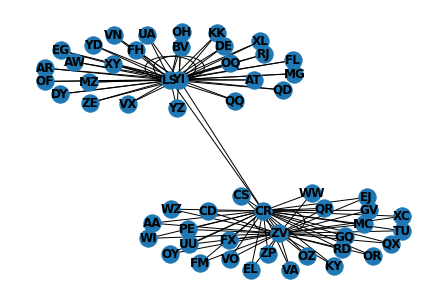

In [225]:
nx.draw(G, with_labels=True, font_weight='bold')

In [276]:
A = [1,2,3,4,5]
A

[1, 2, 3, 4, 5]

In [278]:
t = [True,False,True,False,True]
t

[True, False, True, False, True]

In [281]:
update_list(A,t)

[1, 3, 5]

# part 2

In [432]:
def potentialW2(v,interesting_v,distances,vA,vB,time) :
    pot = 0
    for v1 in interesting_v :
        if v1 == vA or v1 == vB :
            continue
        min_d = min(distances[vA][v1],distances[vB][v1])
        if time > min_d + 1 :
            pot += (time-min_d-1) * v[v1]['f']
    return pot

In [433]:
def potentialW3(v,interesting_v,distances,vA,vB,time,ttvA,ttvB) :
    pot = 0
    pot += (time-ttvA) *  v[vA]['f']
    pot += (time-ttvB) *  v[vB]['f']
    for v1 in interesting_v :
        if v1 == vA or v1 == vB :
            continue
        min_d = min(distances[vA][v1]+ttvA,distances[vB][v1]+ttvB)
        if time > min_d + 1 :
            pot += (time-min_d-1) * v[v1]['f']
    return pot

In [434]:
v = get_valves(test_input)
v

{'AA': {'f': 0,
  'to': ['DD', 'II', 'BB'],
  'open': False,
  'from': ['BB', 'DD', 'II']},
 'DD': {'from': ['AA', 'CC', 'EE'],
  'f': 20,
  'to': ['CC', 'AA', 'EE'],
  'open': False},
 'II': {'from': ['AA', 'JJ'], 'f': 0, 'to': ['AA', 'JJ'], 'open': False},
 'BB': {'from': ['AA', 'CC'], 'f': 13, 'to': ['CC', 'AA'], 'open': False},
 'CC': {'from': ['BB', 'DD'], 'f': 2, 'to': ['DD', 'BB'], 'open': False},
 'EE': {'from': ['DD', 'FF'], 'f': 3, 'to': ['FF', 'DD'], 'open': False},
 'FF': {'from': ['EE', 'GG'], 'f': 0, 'to': ['EE', 'GG'], 'open': False},
 'GG': {'from': ['FF', 'HH'], 'f': 0, 'to': ['FF', 'HH'], 'open': False},
 'HH': {'from': ['GG'], 'f': 22, 'to': ['GG'], 'open': False},
 'JJ': {'from': ['II'], 'f': 21, 'to': ['II'], 'open': False}}

In [435]:
interesting_v = []
for v0 in v.keys() :
    if v[v0]['f'] > 0:
        interesting_v.append(v0)
interesting_v

['DD', 'BB', 'CC', 'EE', 'HH', 'JJ']

In [436]:
distances = {v0 : { v1 :shortest_path(v,v0,v1) for v1 in interesting_v if v1!=v0} for v0 in v.keys() }
distances

{'AA': {'DD': 1, 'BB': 1, 'CC': 2, 'EE': 2, 'HH': 5, 'JJ': 2},
 'DD': {'BB': 2, 'CC': 1, 'EE': 1, 'HH': 4, 'JJ': 3},
 'II': {'DD': 2, 'BB': 2, 'CC': 3, 'EE': 3, 'HH': 6, 'JJ': 1},
 'BB': {'DD': 2, 'CC': 1, 'EE': 3, 'HH': 6, 'JJ': 3},
 'CC': {'DD': 1, 'BB': 1, 'EE': 2, 'HH': 5, 'JJ': 4},
 'EE': {'DD': 1, 'BB': 3, 'CC': 2, 'HH': 3, 'JJ': 4},
 'FF': {'DD': 2, 'BB': 4, 'CC': 3, 'EE': 1, 'HH': 2, 'JJ': 5},
 'GG': {'DD': 3, 'BB': 5, 'CC': 4, 'EE': 2, 'HH': 1, 'JJ': 6},
 'HH': {'DD': 4, 'BB': 6, 'CC': 5, 'EE': 3, 'JJ': 7},
 'JJ': {'DD': 3, 'BB': 3, 'CC': 4, 'EE': 4, 'HH': 7}}

In [437]:
potentialW2(v,interesting_v,distances,'AA','AA',26)

1830

In [311]:
# code it step by step

scores = [0]
times = [26]
position1 = ['AA']
position2 = ['AA']
potentials = [potentialW2(v,interesting_v,distances,"AA","AA",26)]
opened = [[]]

best_score = 0

while len(scores) > 0 :
    
    i = potentials.index(max(potentials))
    
    this_s = scores.pop(i)
    this_t = times.pop(i)
    this_p1 = position1.pop(i)
    this_p2 = position2.pop(i)
    this_pot = potentials.pop(i)
    this_open = opened.pop(i)
    
    # character 1 can go to :
    op_1 = v[this_p1]["to"].copy()
    if this_p1 in interesting_v and this_p1 not in this_open :
        op_1.append(this_p1)
    
    # character 2 can go to :
    op_2 = v[this_p2]["to"].copy()
    if this_p2 in interesting_v and this_p2 not in this_open :
        op_2.append(this_p2)
        
    for new_p1 in op_1 :
        for new_p2 in op_2 :
            
            # update time :
            new_t = this_t -1
            
            # if time at 0 : end of this path
            if new_t == 0 :
                if this_s > best_score :
                    print(this_s)
                    best_score = this_s
                    keep = [potentials[i]>this_s for i in range(len(potentials))]
                    scores = update_list(scores,keep)
                    times = update_list(times,keep)
                    position1 = update_list(position1,keep)
                    position2 = update_list(position2,keep)
                    potentials = update_list(potentials,keep)
                    opened = update_list(opened,keep)
                continue
                    
            
            # update score and list of opened valves
            new_s = this_s
            new_open = this_open.copy()
            if new_p1 == this_p1 :
                new_s += new_t * v[this_p1]['f']
                new_open.append(this_p1)
            if new_p2 == this_p2 and this_p2 not in new_open :
                new_s += new_t * v[this_p2]['f']
                new_open.append(this_p2)
                
            # if all valves opened : nothing left to do
            if set(new_open) == set(interesting_v):
                if new_s > best_score :
                    print(new_s)
                    best_score = new_s
                    keep = [potentials[i]>new_s for i in range(len(potentials))]
                    scores = update_list(scores,keep)
                    times = update_list(times,keep)
                    position1 = update_list(position1,keep)
                    position2 = update_list(position2,keep)
                    potentials = update_list(potentials,keep)
                    opened = update_list(opened,keep)
                continue
                
            # update potential
            new_pot = potentialW2(v,interesting_v,distances,new_p1,new_p2,new_t) + new_s
            
            # add to list
            scores.append(new_s)
            times.append(new_t)
            position1.append(new_p1)
            position2.append(new_p2)
            potentials.append(new_pot)
            opened.append(new_open)

1517


KeyboardInterrupt: 

In [300]:
set([1,2,3]) == set([3,1,2])

True

In [438]:
# potentialW2(v,interesting_v,distances,"AA","AA",26)
# old version : 1830
# new version : same
potentialW3(v,interesting_v,distances,"AA","AA",26,0,0)


1830

In [439]:
# initial iteration :

pos1 = []
pos2 = []
ttp1 = []
ttp2 = []
potentials = []


for iv1 in range(len(interesting_v)-1) :
    for iv2 in range(iv1+1,len(interesting_v)) :
        v1 = interesting_v[iv1]
        v2 = interesting_v[iv2]
        pos1.append(v1)
        pos2.append(v2)
        ttp1.append(distances['AA'][v1])
        ttp2.append(distances['AA'][v2])
        potentials.append(potentialW3(v,interesting_v,distances,v1,v2,26,distances['AA'][v1],distances['AA'][v2]))
        
scores = [0]*len(pos1)
opened = [[]]*len(pos1)
times = [26]*len(pos1)

In [399]:
def move(ttp1_,ttp2_,t_):
    
    if (ttp1_ >= 0 and ttp1_ < ttp2_)  or ttp2_<0 :
#         print("move1")
        ttp1_n = 0
        ttp2_n = ttp2_ - ttp1_
        t_n = t_ - ttp1_
    else :
#         print("move2")
        ttp2_n = 0
        ttp1_n = ttp1_ - ttp2_
        t_n = t_ - ttp2_
        
    return (ttp1_n,ttp2_n,t_n)


In [400]:
def openV(t_,s_,op_,p1_,ttp1_,p2_,ttp2_):
    
    op_n = op_.copy()
    
    if ttp1_ == 0 and ttp2_ == 0:
        # open valve at 1 and 2 simultaneously
        t_n = t_ - 1
        
        s_n = s_ + t_n * v[p1_]['f'] + t_n * v[p2_]['f']
        op_n.append(p1_)
        op_n.append(p2_)
        
        candidates = list(set(interesting_v) - set(op_n))
        
        if len(candidates) == 1 :
            vnext = candidates[0]
            if distances[p1_][vnext] < distances[p2_][vnext] :
                p1_n = vnext
                p2_n = p2_
                ttp1_n = distances[p1_][vnext]
                ttp2_n = -1
            else  :
                p2_n = vnext
                p1_n = p1_
                ttp2_n = distances[p2_][vnext]
                ttp1_n = -1
            return t_n, s_n, op_n, [p1_n], [ttp1_n], [p2_n], [ttp2_n]
        
        p1_ns = []
        p2_ns = []
        ttp1_ns = []
        ttp2_ns = []
        
        for v1 in candidates :
            for v2 in candidates :
                if v1==v2 :
                    continue
                p1_ns.append(v1)
                p2_ns.append(v2)
                ttp1_ns.append(distances[p1_][v1])
                ttp2_ns.append(distances[p2_][v2])
        
        return t_n, s_n, op_n, p1_ns, ttp1_ns, p2_ns, ttp2_ns
    
    elif ttp1_ == 0 :
        # open valve 1
        t_n = t_ - 1
        s_n = s_ + t_n * v[p1_]['f']
        op_n.append(p1_)
        ttp2_n = ttp2_ -1
                
        candidates = list(set(interesting_v) - set(op_n) - set([p2_]))
        
        if len(candidates) == 0 :
            return t_n, s_n, op_n, [p1_], [-1], [p2_], [ttp2_n]
        
        p1_ns = []
        p2_ns = []
        ttp1_ns = []
        ttp2_ns = []
        for v1 in candidates :
            if distances[p1_][v1] < t_n-2 :
                p1_ns.append(v1)
                p2_ns.append(p2_)
                ttp1_ns.append(distances[p1_][v1])
                ttp2_ns.append(ttp2_n)        
        if len(p1_ns) == 0 :
            return t_n, s_n, op_n, [p1_], [-1], [p2_], [ttp2_n]
        return t_n, s_n, op_n, p1_ns, ttp1_ns, p2_ns, ttp2_ns
    
    elif ttp2_ == 0 :
        # open valve 2
        t_n = t_ - 1
        s_n = s_ + t_n * v[p2_]['f']
        op_n.append(p2_)
        ttp1_n = ttp1_ -1
        
        candidates = list(set(interesting_v) - set(op_n) - set([p1_]))
        
        if len(candidates) == 0 :
            return t_n, s_n, op_n, [p1_], [ttp1_n], [p2_], [-1]
        
        p1_ns = []
        p2_ns = []
        ttp1_ns = []
        ttp2_ns = []
        for v2 in candidates :
            if distances[p2_][v2] < t_n -2 :
                p2_ns.append(v2)
                p1_ns.append(p1_)
                ttp2_ns.append(distances[p2_][v2])
                ttp1_ns.append(ttp1_n)
        if len(p2_ns) == 0 :
            return t_n, s_n, op_n, [p1_], [ttp1_n], [p2_], [-1]
        return t_n, s_n, op_n, p1_ns, ttp1_ns, p2_ns, ttp2_ns
    else :
        print("problem in open V !")
        return None
    

In [440]:
potentials

[1821,
 1784,
 1785,
 1804,
 1845,
 1713,
 1764,
 1777,
 1774,
 1685,
 1698,
 1737,
 1675,
 1758,
 1721]

In [452]:
# initial iteration :

pos1 = []
pos2 = []
ttp1 = []
ttp2 = []
potentials = []


for iv1 in range(len(interesting_v)-1) :
    for iv2 in range(iv1+1,len(interesting_v)) :
        v1 = interesting_v[iv1]
        v2 = interesting_v[iv2]
        pos1.append(v1)
        pos2.append(v2)
        ttp1.append(distances['AA'][v1])
        ttp2.append(distances['AA'][v2])
        potentials.append(potentialW3(v,interesting_v,distances,v1,v2,26,distances['AA'][v1],distances['AA'][v2]))
        
scores = [0]*len(pos1)
opened = [[]]*len(pos1)
times = [26]*len(pos1)

In [453]:
best_score = 1651
# best_score = 0

while len(pos1) > 0:
    
    # select strongest potential
    i = potentials.index(max(potentials))
    
    # get the path for this
    s_ = scores.pop(i)
    pot_ = potentials.pop(i)
    op_ = opened.pop(i)
    t_ = times.pop(i)
    p1_ = pos1.pop(i)
    p2_ = pos2.pop(i)
    ttp1_ = ttp1.pop(i)
    ttp2_ = ttp2.pop(i)
    
    # move that group
#     print(ttp1_,ttp2_,t_)
    ttp1_n,ttp2_n,t_n = move(ttp1_,ttp2_,t_)
#     print(ttp1_n,ttp2_n,t_n)
    
    # open valve(s)
    t_n, s_n, op_n, all_p1_n, all_ttp1_n, all_p2_n, all_ttp2_n = openV(t_n,s_,op_,p1_,ttp1_n,p2_,ttp2_n)
    
    # check if end path and add to list if not
    for ii in range(len(all_p1_n)) :
        
        ttp1_n = all_ttp1_n[ii]
        ttp2_n = all_ttp2_n[ii]
        
        if ttp1_n < 0 and ttp2_n < 0 :
#             print("path completed : ", s_n, t_n,"\t",op_n)
            # path complete
            if s_n > best_score :
                print(s_n)
                best_score = s_n
                keep = [potentials[i]>best_score for i in range(len(potentials))]
                scores = update_list(scores,keep)
                potentials = update_list(potentials,keep)
                opened = update_list(opened,keep)
                times = update_list(times,keep)
                pos1 = update_list(pos1,keep)
                pos2 = update_list(pos2,keep)
                ttp1 = update_list(ttp1,keep)
                ttp2 = update_list(ttp2,keep)
            continue
        
        p1_n = all_p1_n[ii]
        p2_n = all_p2_n[ii]
        
        pot_n = potentialW3(v,interesting_v,distances,p1_n,p2_n,t_n,ttp1_n,ttp2_n) + s_n
        
#         print(ttp1_n, ttp2_n, t_n,"\t", s_n ,pot_n, op_n,"\n")
        
        if pot_n > best_score :        
            scores.append(s_n)
            potentials.append(pot_n)
            opened.append(op_n)
            times.append(t_n)
            pos1.append(p1_n)
            pos2.append(p2_n)
            ttp1.append(ttp1_n)
            ttp2.append(ttp2_n)
#         else :
#             print("suppress path :\t",s_n,pot_n,best_score,op_n,p1_n,p2_n)


1706
1707


# part 2 real solution

In [454]:
v = get_valves(my_input)
v

{'EG': {'f': 21,
  'to': ['WZ', 'OF', 'ZP', 'QD'],
  'open': False,
  'from': ['OF', 'QD', 'WZ', 'ZP']},
 'WZ': {'from': ['EG', 'FH'], 'f': 0, 'to': ['FH', 'EG'], 'open': False},
 'OF': {'from': ['EG', 'EJ'], 'f': 0, 'to': ['EJ', 'EG'], 'open': False},
 'ZP': {'from': ['EG', 'MC'], 'f': 0, 'to': ['EG', 'MC'], 'open': False},
 'QD': {'from': ['EG', 'OR'], 'f': 0, 'to': ['OR', 'EG'], 'open': False},
 'OR': {'f': 0, 'to': ['QD', 'CR'], 'open': False, 'from': ['QD', 'CR']},
 'CR': {'from': ['OR', 'RJ', 'QQ', 'ZE', 'LS'],
  'f': 8,
  'to': ['OR', 'ZE', 'RJ', 'LS', 'QQ'],
  'open': False},
 'VO': {'f': 0, 'to': ['FL', 'OY'], 'open': False, 'from': ['FL', 'OY']},
 'FL': {'from': ['VO', 'FH'], 'f': 22, 'to': ['VO', 'FH'], 'open': False},
 'OY': {'from': ['VO', 'QX', 'RD', 'AR', 'GV'],
  'f': 13,
  'to': ['RD', 'VO', 'AR', 'GV', 'QX'],
  'open': False},
 'BV': {'f': 0, 'to': ['AA', 'KK'], 'open': False, 'from': ['AA', 'KK']},
 'AA': {'from': ['BV', 'PE', 'ZE', 'XL'],
  'f': 0,
  'to': ['BV', 'Z

In [458]:
interesting_v = my_interesting_v
# interesting_v

In [456]:
distances = my_distances

In [474]:
# initial iteration :

pos1 = []
pos2 = []
ttp1 = []
ttp2 = []
potentials = []


for iv1 in range(len(interesting_v)-1) :
    for iv2 in range(iv1+1,len(interesting_v)) :
        v1 = interesting_v[iv1]
        v2 = interesting_v[iv2]
        pos1.append(v1)
        pos2.append(v2)
        ttp1.append(distances['AA'][v1])
        ttp2.append(distances['AA'][v2])
        potentials.append(potentialW3(v,interesting_v,distances,v1,v2,26,distances['AA'][v1],distances['AA'][v2]))
        
scores = [0]*len(pos1)
opened = [[]]*len(pos1)
times = [26]*len(pos1)

In [475]:
best_score = 2087
# best_score = 0
best_score = 2388

while len(pos1) > 0:
    
    # select strongest potential
#     i = potentials.index(max(potentials))
#     print(len(potentials),np.mean(potentials))
    
    i = -1
    
    # get the path for this
    s_ = scores.pop(i)
    pot_ = potentials.pop(i)
    op_ = opened.pop(i)
    t_ = times.pop(i)
    p1_ = pos1.pop(i)
    p2_ = pos2.pop(i)
    ttp1_ = ttp1.pop(i)
    ttp2_ = ttp2.pop(i)
    
    # move that group
#     print(ttp1_,ttp2_,t_)
    ttp1_n,ttp2_n,t_n = move(ttp1_,ttp2_,t_)
#     print(ttp1_n,ttp2_n,t_n)
    
    # open valve(s)
    t_n, s_n, op_n, all_p1_n, all_ttp1_n, all_p2_n, all_ttp2_n = openV(t_n,s_,op_,p1_,ttp1_n,p2_,ttp2_n)
    
    # check if end path and add to list if not
    for ii in range(len(all_p1_n)) :
        
        ttp1_n = all_ttp1_n[ii]
        ttp2_n = all_ttp2_n[ii]
        
        if ttp1_n < 0 and ttp2_n < 0 :
            print("path completed : ", s_n, t_n,"\t",op_n)
            # path complete
            if s_n > best_score :
                print("\t\t",s_n)
                best_score = s_n
                keep = [potentials[i]>best_score for i in range(len(potentials))]
                scores = update_list(scores,keep)
                potentials = update_list(potentials,keep)
                opened = update_list(opened,keep)
                times = update_list(times,keep)
                pos1 = update_list(pos1,keep)
                pos2 = update_list(pos2,keep)
                ttp1 = update_list(ttp1,keep)
                ttp2 = update_list(ttp2,keep)
            continue
        
        p1_n = all_p1_n[ii]
        p2_n = all_p2_n[ii]
        
        pot_n = potentialW3(v,interesting_v,distances,p1_n,p2_n,t_n,ttp1_n,ttp2_n) + s_n
        
#         print(ttp1_n, ttp2_n, t_n,"\t", s_n ,pot_n, op_n,"\n")
        
        if pot_n > best_score :        
            scores.append(s_n)
            potentials.append(pot_n)
            opened.append(op_n)
            times.append(t_n)
            pos1.append(p1_n)
            pos2.append(p2_n)
            ttp1.append(ttp1_n)
            ttp2.append(ttp2_n)
#         else :
#             print("suppress path :\t",s_n,pot_n,best_score,op_n,p1_n,p2_n)


path completed :  2019 4 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'OY', 'FL', 'EL', 'YI']
path completed :  2008 4 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'OY', 'YI', 'FL', 'EL']
path completed :  1984 4 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'OY', 'YI', 'EL', 'FL']
path completed :  2081 2 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'EL', 'OY', 'CR', 'FL', 'OZ', 'FX']
path completed :  2003 3 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'EL', 'OY', 'CR', 'YI', 'FX']
path completed :  2039 2 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'EL', 'OY', 'CR', 'YI', 'OZ', 'FX']
path completed :  1981 1 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'EL', 'OY', 'CR', 'YI', 'VA']
path completed :  2103 2 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'EL', 'OY', 'FL', 'YI', 'CR']
path completed :  2087 3 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'EL', 'FL', 'YI', 'OY', 'CR']
path completed :  2083 2 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'EL', 'FL', 'YI', 'OY', 'OZ']
path completed :  2106 4 	 ['WW', 'UA', 'XY', 'AW', 'EG', 'EL', 'OY', 'YI', 'FL', 'OZ']
path completed :  2049 6 	 ['WW', 'UA'

path completed :  2110 2 	 ['WW', 'YI', 'VA', 'FX', 'AW', 'OZ', 'EL', 'OY', 'GQ', 'FL', 'EG']
path completed :  2114 2 	 ['WW', 'YI', 'VA', 'EG', 'FX', 'OZ', 'FL', 'OY', 'GQ', 'UA', 'AW']
path completed :  2140 3 	 ['WW', 'YI', 'VA', 'EG', 'FX', 'OZ', 'FL', 'OY', 'GQ', 'EL', 'AW']
path completed :  2132 2 	 ['WW', 'YI', 'VA', 'EG', 'FX', 'OZ', 'FL', 'OY', 'GQ', 'AW', 'UA']
path completed :  2126 2 	 ['WW', 'YI', 'VA', 'EG', 'FX', 'OZ', 'FL', 'OY', 'GQ', 'AW', 'EL']
path completed :  2080 3 	 ['WW', 'YI', 'VA', 'EG', 'OZ', 'FL', 'FX', 'OY', 'GQ', 'EL', 'AW']
path completed :  1908 7 	 ['WW', 'TU', 'CR', 'YI', 'EG', 'UA', 'FL', 'AW', 'OY', 'EL']
path completed :  1974 4 	 ['WW', 'TU', 'UA', 'FX', 'AW', 'EL', 'CR', 'OY', 'EG', 'YI', 'XY']
path completed :  2071 3 	 ['WW', 'TU', 'UA', 'FX', 'AW', 'OZ', 'EL', 'CR', 'OY', 'EG', 'YI', 'XY']
path completed :  2065 3 	 ['WW', 'TU', 'UA', 'FX', 'AW', 'OZ', 'EL', 'CR', 'OY', 'EG', 'YI', 'FL']
path completed :  2033 3 	 ['WW', 'TU', 'UA', 'FX', 'A

path completed :  1840 3 	 ['WW', 'TU', 'YI', 'UA', 'OY', 'FL', 'EL', 'AW', 'EG', 'CR']
path completed :  1888 3 	 ['WW', 'TU', 'YI', 'UA', 'OY', 'FL', 'EL', 'AW', 'EG', 'XY']
path completed :  1806 4 	 ['WW', 'TU', 'YI', 'UA', 'OY', 'EL', 'FL', 'AW', 'XY']
path completed :  1881 3 	 ['WW', 'TU', 'YI', 'UA', 'OY', 'EL', 'FL', 'AW', 'EG', 'CR']
path completed :  1929 3 	 ['WW', 'TU', 'YI', 'UA', 'OY', 'EL', 'FL', 'AW', 'EG', 'XY']
path completed :  1989 4 	 ['WW', 'TU', 'YI', 'UA', 'AW', 'FL', 'OY', 'EG', 'EL', 'XY']
path completed :  1817 2 	 ['WW', 'TU', 'YI', 'UA', 'OY', 'EL', 'FL', 'AW', 'EG', 'CR']
path completed :  1849 2 	 ['WW', 'TU', 'YI', 'UA', 'OY', 'EL', 'FL', 'AW', 'EG', 'XY']
path completed :  2065 2 	 ['WW', 'TU', 'YI', 'UA', 'VA', 'OY', 'FX', 'EL', 'OZ', 'AW', 'CR', 'EG']
path completed :  2047 4 	 ['WW', 'TU', 'YI', 'UA', 'VA', 'OY', 'FX', 'EL', 'OZ', 'AW', 'GQ']
path completed :  2038 3 	 ['WW', 'TU', 'YI', 'UA', 'VA', 'OY', 'FX', 'EL', 'OZ', 'AW', 'EG']
path completed

path completed :  1994 4 	 ['OZ', 'TU', 'WW', 'FX', 'YI', 'OY', 'GQ', 'UA', 'VA', 'AW', 'EL']
path completed :  1978 3 	 ['OZ', 'TU', 'WW', 'FX', 'YI', 'OY', 'GQ', 'FL', 'VA', 'EL', 'AW']
path completed :  2026 3 	 ['OZ', 'TU', 'WW', 'FX', 'YI', 'OY', 'GQ', 'FL', 'VA', 'EG', 'XY']
path completed :  1980 2 	 ['OZ', 'TU', 'WW', 'FX', 'YI', 'OY', 'GQ', 'AW', 'VA', 'UA', 'EL']
path completed :  1971 3 	 ['OZ', 'TU', 'WW', 'FX', 'YI', 'GQ', 'AW', 'EL', 'VA', 'OY', 'FL']
path completed :  1889 4 	 ['OZ', 'TU', 'WW', 'FX', 'YI', 'GQ', 'EG', 'VA', 'UA', 'AW']
path completed :  1980 3 	 ['OZ', 'TU', 'WW', 'FX', 'YI', 'GQ', 'EG', 'FL', 'VA', 'OY', 'EL']
path completed :  1982 2 	 ['OZ', 'TU', 'WW', 'FX', 'YI', 'GQ', 'EG', 'FL', 'VA', 'OY', 'AW']
path completed :  2011 4 	 ['OZ', 'TU', 'WW', 'YI', 'CR', 'UA', 'EG', 'AW', 'XY', 'OY', 'FL']
path completed :  1987 4 	 ['OZ', 'TU', 'WW', 'YI', 'CR', 'UA', 'EG', 'AW', 'XY', 'OY', 'EL']
path completed :  1955 3 	 ['OZ', 'TU', 'WW', 'YI', 'CR', 'UA', 'E

path completed :  1861 4 	 ['OZ', 'TU', 'CR', 'VA', 'UA', 'FX', 'AW', 'GQ', 'EL', 'OY']
path completed :  1867 5 	 ['OZ', 'TU', 'CR', 'VA', 'YI', 'FX', 'UA', 'GQ', 'OY', 'FL']
path completed :  1817 4 	 ['OZ', 'TU', 'CR', 'VA', 'YI', 'FX', 'UA', 'GQ', 'EL', 'OY']
path completed :  1865 4 	 ['OZ', 'TU', 'CR', 'VA', 'YI', 'FX', 'UA', 'GQ', 'EL', 'AW']
path completed :  1876 5 	 ['OZ', 'TU', 'CR', 'VA', 'YI', 'FX', 'OY', 'GQ', 'AW', 'UA']
path completed :  1861 5 	 ['OZ', 'TU', 'CR', 'VA', 'YI', 'FX', 'OY', 'GQ', 'AW', 'EL']
path completed :  1839 4 	 ['OZ', 'TU', 'CR', 'VA', 'YI', 'FX', 'AW', 'GQ', 'EL', 'OY']
path completed :  1862 4 	 ['OZ', 'TU', 'CR', 'VA', 'YI', 'FX', 'EG', 'GQ', 'FL', 'OY']
path completed :  1937 4 	 ['OZ', 'TU', 'CR', 'VA', 'EG', 'FX', 'FL', 'GQ', 'OY', 'UA']
path completed :  1991 2 	 ['OZ', 'TU', 'CR', 'VA', 'EG', 'FX', 'FL', 'GQ', 'OY', 'EL', 'AW']
path completed :  1961 4 	 ['OZ', 'TU', 'CR', 'VA', 'EG', 'FX', 'FL', 'GQ', 'OY', 'AW']
path completed :  1974 2 	

path completed :  1902 5 	 ['OZ', 'TU', 'YI', 'OY', 'UA', 'FL', 'AW', 'EL', 'XY']
path completed :  1936 2 	 ['OZ', 'TU', 'YI', 'EG', 'UA', 'AW', 'FL', 'EL', 'OY', 'WW']
path completed :  1823 4 	 ['OZ', 'TU', 'YI', 'UA', 'OY', 'AW', 'FL', 'EL', 'WW']
path completed :  1989 4 	 ['OZ', 'TU', 'YI', 'UA', 'AW', 'FL', 'EL', 'EG', 'OY', 'XY']
path completed :  1970 3 	 ['OZ', 'TU', 'YI', 'VA', 'UA', 'FX', 'OY', 'GQ', 'FL', 'EL']
path completed :  1972 2 	 ['OZ', 'TU', 'YI', 'VA', 'UA', 'FX', 'OY', 'GQ', 'FL', 'AW']
path completed :  2006 4 	 ['OZ', 'TU', 'YI', 'VA', 'UA', 'FX', 'OY', 'GQ', 'FL', 'EG']
path completed :  1940 3 	 ['OZ', 'TU', 'YI', 'VA', 'UA', 'FX', 'OY', 'GQ', 'EL', 'FL']
path completed :  1999 5 	 ['OZ', 'TU', 'YI', 'VA', 'UA', 'FX', 'OY', 'GQ', 'EL', 'AW']
path completed :  1985 4 	 ['OZ', 'TU', 'YI', 'VA', 'UA', 'FX', 'OY', 'GQ', 'AW', 'EL']
path completed :  1942 4 	 ['OZ', 'TU', 'YI', 'VA', 'UA', 'FX', 'EL', 'GQ', 'OY', 'FL']
path completed :  1929 3 	 ['OZ', 'TU', 'YI'

path completed :  2175 2 	 ['OZ', 'WW', 'YI', 'TU', 'EG', 'FX', 'VA', 'FL', 'OY', 'GQ', 'UA', 'AW']
path completed :  2193 2 	 ['OZ', 'WW', 'YI', 'TU', 'EG', 'FX', 'VA', 'FL', 'OY', 'GQ', 'AW', 'UA']
path completed :  2187 2 	 ['OZ', 'WW', 'YI', 'TU', 'EG', 'FX', 'VA', 'FL', 'OY', 'GQ', 'AW', 'EL']
path completed :  2148 4 	 ['OZ', 'WW', 'CR', 'UA', 'AW', 'XY', 'EL', 'OY', 'EG', 'FL', 'YI']
path completed :  2134 4 	 ['OZ', 'WW', 'CR', 'UA', 'AW', 'XY', 'EL', 'OY', 'EG', 'YI', 'FL']
path completed :  1915 4 	 ['OZ', 'WW', 'CR', 'UA', 'YI', 'XY', 'OY', 'FL', 'EG', 'EL']
path completed :  1926 3 	 ['OZ', 'WW', 'CR', 'UA', 'YI', 'XY', 'OY', 'FL', 'EG', 'AW']
path completed :  1872 4 	 ['OZ', 'WW', 'CR', 'UA', 'YI', 'XY', 'FL', 'EG', 'OY', 'EL']
path completed :  1883 3 	 ['OZ', 'WW', 'CR', 'UA', 'YI', 'XY', 'FL', 'EG', 'OY', 'AW']
path completed :  2051 2 	 ['OZ', 'WW', 'CR', 'UA', 'AW', 'OY', 'EL', 'FL', 'YI', 'EG', 'XY']
path completed :  1966 2 	 ['OZ', 'WW', 'CR', 'UA', 'YI', 'OY', 'F

path completed :  1931 4 	 ['OZ', 'WW', 'CR', 'FL', 'UA', 'EG', 'AW', 'XY', 'EL', 'OY']
path completed :  1875 2 	 ['OZ', 'WW', 'CR', 'FL', 'YI', 'OY', 'UA', 'EL', 'AW', 'EG']
path completed :  1957 2 	 ['OZ', 'WW', 'CR', 'FL', 'YI', 'OY', 'UA', 'EL', 'AW', 'EG', 'XY']
path completed :  1826 2 	 ['OZ', 'WW', 'CR', 'FL', 'YI', 'UA', 'EL', 'AW', 'OY', 'EG']
path completed :  2045 2 	 ['OZ', 'WW', 'CR', 'FL', 'YI', 'UA', 'EG', 'AW', 'XY', 'OY', 'EL']
path completed :  2083 3 	 ['OZ', 'WW', 'CR', 'FL', 'YI', 'UA', 'EG', 'AW', 'XY', 'EL', 'OY']
path completed :  1962 7 	 ['OZ', 'WW', 'CR', 'FL', 'EG', 'OY', 'YI', 'EL', 'UA', 'AW']
path completed :  1948 6 	 ['OZ', 'WW', 'CR', 'FL', 'EG', 'OY', 'YI', 'AW', 'UA', 'EL']
path completed :  1913 2 	 ['OZ', 'WW', 'CR', 'EL', 'OY', 'AW', 'FL', 'UA', 'YI', 'EG', 'XY']
path completed :  1869 3 	 ['OZ', 'WW', 'CR', 'EL', 'YI', 'OY', 'UA', 'FL', 'AW', 'XY']
path completed :  1971 2 	 ['OZ', 'WW', 'CR', 'EL', 'YI', 'OY', 'UA', 'FL', 'AW', 'EG', 'XY']
pa

path completed :  2100 7 	 ['OZ', 'WW', 'YI', 'CR', 'EG', 'UA', 'FL', 'AW', 'OY', 'EL']
path completed :  2061 6 	 ['OZ', 'WW', 'YI', 'CR', 'EG', 'UA', 'FL', 'AW', 'EL', 'OY']
path completed :  2014 6 	 ['OZ', 'WW', 'YI', 'CR', 'EG', 'FL', 'AW', 'OY', 'UA', 'EL']
path completed :  1989 5 	 ['OZ', 'WW', 'YI', 'CR', 'EG', 'FL', 'AW', 'OY', 'EL', 'UA']
path completed :  1924 6 	 ['OZ', 'WW', 'CR', 'EG', 'YI', 'UA', 'OY', 'AW', 'FL', 'EL']
path completed :  2037 7 	 ['OZ', 'WW', 'CR', 'EG', 'YI', 'FL', 'UA', 'OY', 'AW', 'EL']
path completed :  1988 5 	 ['OZ', 'WW', 'CR', 'EG', 'YI', 'FL', 'UA', 'AW', 'EL', 'OY']
path completed :  1871 3 	 ['OZ', 'WW', 'CR', 'UA', 'YI', 'AW', 'EL', 'FL', 'OY', 'XY']
path completed :  1973 2 	 ['OZ', 'WW', 'CR', 'UA', 'YI', 'AW', 'EL', 'FL', 'OY', 'EG', 'XY']
path completed :  1999 5 	 ['OZ', 'WW', 'CR', 'UA', 'EG', 'AW', 'FL', 'EL', 'OY', 'YI']
path completed :  2001 6 	 ['OZ', 'WW', 'CR', 'UA', 'EG', 'AW', 'FL', 'EL', 'OY', 'YI']
path completed :  1957 5 	

path completed :  1962 5 	 ['OZ', 'WW', 'FX', 'UA', 'TU', 'AW', 'OY', 'YI', 'EL', 'FL']
path completed :  1962 5 	 ['OZ', 'WW', 'FX', 'UA', 'AW', 'CR', 'OY', 'YI', 'EL', 'FL']
path completed :  2098 3 	 ['OZ', 'WW', 'FX', 'UA', 'AW', 'CR', 'OY', 'EG', 'FL', 'YI', 'EL']
path completed :  2068 3 	 ['OZ', 'WW', 'FX', 'UA', 'AW', 'CR', 'OY', 'EG', 'EL', 'YI', 'FL']
path completed :  2061 3 	 ['OZ', 'WW', 'FX', 'UA', 'AW', 'CR', 'EL', 'OY', 'XY', 'YI', 'EG']
path completed :  2183 4 	 ['OZ', 'WW', 'FX', 'UA', 'AW', 'CR', 'EL', 'EG', 'FL', 'XY', 'OY']
path completed :  2129 4 	 ['OZ', 'WW', 'FX', 'UA', 'AW', 'CR', 'EL', 'EG', 'FL', 'YI', 'OY']
path completed :  2178 3 	 ['OZ', 'WW', 'FX', 'UA', 'VA', 'AW', 'TU', 'OY', 'FL', 'YI', 'EL']
path completed :  2214 4 	 ['OZ', 'WW', 'FX', 'UA', 'VA', 'AW', 'TU', 'OY', 'FL', 'YI', 'EG']
path completed :  2294 2 	 ['OZ', 'WW', 'FX', 'UA', 'VA', 'AW', 'EL', 'TU', 'OY', 'FL', 'YI', 'EG']
path completed :  2183 3 	 ['OZ', 'WW', 'FX', 'UA', 'VA', 'AW', 'E

path completed :  2318 2 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'OY', 'EL', 'CR', 'FL']
path completed :  2411 3 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'OY', 'FL', 'GQ', 'EG']
path completed :  2395 -2 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'EL', 'OY', 'CR', 'FL', 'EG', 'XY']
path completed :  2395 -2 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'EL', 'OY', 'CR', 'FL', 'EG', 'XY']
path completed :  2354 2 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'EL', 'OY', 'CR', 'EG']
path completed :  2379 3 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'EL', 'FL', 'CR', 'OY']
path completed :  2382 2 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'EL', 'FL', 'CR', 'EG']
path completed :  2358 -1 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'EL', 'OY', 'FL', 'XY']
path completed :  2381 2 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'EL', 'FL', 'OY', 'EG']
path completed :  2454 4 	 ['OZ', 'WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU

path completed :  2060 6 	 ['OZ', 'WW', 'YI', 'OY', 'EL', 'FL', 'AW', 'EG', 'UA', 'CR']
path completed :  2014 3 	 ['OZ', 'WW', 'YI', 'EG', 'EL', 'FL', 'AW', 'OY', 'UA', 'CR']
path completed :  2185 5 	 ['OZ', 'WW', 'VA', 'UA', 'FX', 'AW', 'EL', 'CR', 'OY', 'YI', 'EG']
path completed :  2136 5 	 ['OZ', 'WW', 'YI', 'VA', 'UA', 'FX', 'OY', 'TU', 'EL', 'AW', 'CR']
path completed :  2168 4 	 ['OZ', 'WW', 'YI', 'VA', 'UA', 'FX', 'OY', 'TU', 'EL', 'AW', 'GQ']
path completed :  2196 5 	 ['OZ', 'WW', 'YI', 'VA', 'UA', 'FX', 'OY', 'EL', 'CR', 'AW', 'EG']
path completed :  2182 5 	 ['OZ', 'WW', 'YI', 'VA', 'UA', 'FX', 'OY', 'CR', 'AW', 'EL', 'EG']
path completed :  2245 4 	 ['OZ', 'WW', 'YI', 'VA', 'UA', 'FX', 'OY', 'GQ', 'EL', 'AW', 'TU']
path completed :  2233 2 	 ['OZ', 'WW', 'YI', 'VA', 'UA', 'FX', 'OY', 'GQ', 'EL', 'AW', 'CR']
path completed :  2231 4 	 ['OZ', 'WW', 'YI', 'VA', 'UA', 'FX', 'OY', 'GQ', 'AW', 'EL', 'TU']
path completed :  2161 2 	 ['OZ', 'WW', 'YI', 'VA', 'UA', 'FX', 'OY', 'E

path completed :  2039 3 	 ['OZ', 'WW', 'UA', 'EG', 'AW', 'FL', 'OY', 'EL', 'YI', 'CR']
path completed :  2077 3 	 ['OZ', 'WW', 'UA', 'EG', 'AW', 'FL', 'EL', 'OY', 'YI', 'CR']
path completed :  2077 3 	 ['OZ', 'WW', 'UA', 'EG', 'AW', 'FL', 'EL', 'OY', 'YI', 'CR']
path completed :  1954 3 	 ['OZ', 'WW', 'OY', 'EG', 'UA', 'FL', 'AW', 'EL', 'YI', 'CR']
path completed :  1996 3 	 ['OZ', 'WW', 'OY', 'EG', 'EL', 'FL', 'AW', 'UA', 'YI', 'CR']
path completed :  2113 5 	 ['OZ', 'WW', 'YI', 'UA', 'EG', 'OY', 'XY', 'EL', 'AW', 'CR']
path completed :  2183 5 	 ['OZ', 'WW', 'YI', 'UA', 'EG', 'OY', 'XY', 'EL', 'AW', 'FL']
path completed :  2169 5 	 ['OZ', 'WW', 'YI', 'UA', 'EG', 'OY', 'FL', 'EL', 'AW', 'XY']
path completed :  2051 7 	 ['OZ', 'WW', 'YI', 'UA', 'EG', 'OY', 'FL', 'AW', 'EL']
path completed :  1982 7 	 ['OZ', 'WW', 'YI', 'UA', 'EG', 'EL', 'OY', 'AW', 'FL']
path completed :  2117 5 	 ['OZ', 'WW', 'YI', 'UA', 'EG', 'AW', 'CR', 'EL', 'OY', 'FL']
path completed :  2271 5 	 ['OZ', 'WW', 'YI'

path completed :  2147 2 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'FL', 'TU', 'FX']
path completed :  2139 2 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'FL', 'TU', 'OZ']
path completed :  2175 2 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'FL', 'FX', 'TU']
path completed :  2191 3 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'FL', 'FX', 'OZ']
path completed :  2221 3 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'FL', 'FX', 'VA']
path completed :  2197 2 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'FL', 'FX', 'GQ']
path completed :  2185 4 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'OZ', 'FL', 'TU']
path completed :  2267 2 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'OZ', 'FL', 'FX', 'VA']
path completed :  2217 3 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'OZ', 'FL', 'VA']
path completed :  2193 2 	 ['WW', 'YI', 'UA', 'AW', 'EG', 'EL', 'CR', 'OY', 'OZ', 'FL', 'GQ']
path completed :  2197 5 	 ['WW', 'YI', 'UA', 'AW', 'E

path completed :  2268 3 	 ['OZ', 'FX', 'UA', 'VA', 'AW', 'EL', 'WW', 'FL', 'YI', 'OY', 'EG']
path completed :  2307 4 	 ['OZ', 'FX', 'UA', 'VA', 'AW', 'EL', 'OY', 'YI', 'FL', 'EG']
path completed :  2264 4 	 ['OZ', 'FX', 'UA', 'VA', 'AW', 'EL', 'FL', 'YI', 'OY', 'EG']
path completed :  2264 4 	 ['OZ', 'FX', 'UA', 'VA', 'AW', 'EL', 'FL', 'YI', 'OY', 'EG']
path completed :  2132 5 	 ['OZ', 'FX', 'UA', 'VA', 'YI', 'OY', 'EL', 'CR', 'AW', 'EG']
path completed :  2181 4 	 ['OZ', 'FX', 'UA', 'VA', 'YI', 'OY', 'GQ', 'EL', 'AW', 'TU']
path completed :  2097 2 	 ['OZ', 'FX', 'UA', 'VA', 'YI', 'OY', 'EL', 'AW', 'EG', 'CR']
path completed :  2129 2 	 ['OZ', 'FX', 'UA', 'VA', 'YI', 'OY', 'EL', 'AW', 'EG', 'XY']
path completed :  2125 2 	 ['OZ', 'FX', 'UA', 'VA', 'YI', 'OY', 'EL', 'AW', 'EG', 'FL']
path completed :  2053 5 	 ['OZ', 'FX', 'UA', 'AW', 'YI', 'OY', 'FL', 'EL', 'EG']
path completed :  2070 2 	 ['OZ', 'FX', 'UA', 'AW', 'YI', 'FL', 'OY', 'EL', 'EG', 'CR']
path completed :  2102 2 	 ['OZ'

path completed :  2027 2 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'OY', 'CR', 'EL', 'AW', 'OZ', 'TU']
path completed :  2127 2 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'OY', 'CR', 'EL', 'AW', 'EG', 'XY']
path completed :  2123 2 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'OY', 'CR', 'EL', 'AW', 'EG', 'FL']
path completed :  2180 5 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'OZ', 'OY', 'EL', 'CR', 'AW', 'EG']
path completed :  2115 6 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'OZ', 'OY', 'AW', 'GQ', 'EL']
path completed :  2145 2 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'OZ', 'OY', 'EL', 'AW', 'EG', 'CR']
path completed :  2177 2 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'OZ', 'OY', 'EL', 'AW', 'EG', 'XY']
path completed :  2173 2 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'OZ', 'OY', 'EL', 'AW', 'EG', 'FL']
path completed :  2207 2 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'OZ', 'OY', 'CR', 'EL', 'FL']
path completed :  2179 4 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'OZ', 'OY', 'EL', 'FL']
path completed :  2373 3 	 ['WW', 'FX', 'YI', 'VA', 'UA', 'AW', 'OZ', 'E

path completed :  2322 4 	 ['TU', 'YI', 'UA', 'OZ', 'AW', 'FX', 'EL', 'VA', 'FL', 'GQ', 'OY']
path completed :  2091 6 	 ['TU', 'YI', 'UA', 'OZ', 'AW', 'CR', 'OY', 'EG', 'EL', 'FL']
path completed :  2022 7 	 ['TU', 'YI', 'UA', 'OZ', 'AW', 'OY', 'EG', 'EL', 'FL']
path completed :  2149 3 	 ['TU', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'OZ', 'OY', 'WW', 'CR']
path completed :  2210 2 	 ['WW', 'YI', 'TU', 'UA', 'AW', 'FX', 'EL', 'OZ', 'OY', 'VA', 'FL', 'EG']
path completed :  2274 3 	 ['WW', 'YI', 'UA', 'FX', 'AW', 'OZ', 'EL', 'CR', 'OY', 'EG', 'FL', 'XY']
path completed :  2056 3 	 ['WW', 'YI', 'CR', 'UA', 'AW', 'XY', 'FL', 'EG', 'OY', 'EL']
path completed :  2173 6 	 ['WW', 'YI', 'CR', 'UA', 'AW', 'EL', 'XY', 'OY', 'EG', 'FL']
path completed :  2126 4 	 ['WW', 'YI', 'CR', 'UA', 'EG', 'OY', 'EL', 'XY', 'AW', 'FL']
path completed :  2112 4 	 ['WW', 'YI', 'CR', 'UA', 'EG', 'OY', 'EL', 'FL', 'AW', 'XY']
path completed :  1986 6 	 ['WW', 'YI', 'CR', 'UA', 'EG', 'OY', 'FL', 'AW', 'EL']
path com

path completed :  2419 2 	 ['WW', 'YI', 'OZ', 'UA', 'AW', 'VA', 'EL', 'FX', 'OY', 'GQ', 'FL', 'EG']
path completed :  2334 4 	 ['WW', 'YI', 'OZ', 'UA', 'AW', 'VA', 'EL', 'FX', 'GQ', 'FL', 'OY']
path completed :  2345 3 	 ['WW', 'YI', 'OZ', 'UA', 'AW', 'VA', 'EL', 'FX', 'GQ', 'FL', 'EG']
path completed :  2254 4 	 ['WW', 'YI', 'OZ', 'UA', 'AW', 'VA', 'EL', 'GQ', 'FL', 'FX', 'OY']
path completed :  1947 3 	 ['WW', 'YI', 'OZ', 'UA', 'OY', 'FL', 'AW', 'EL', 'EG', 'CR']
path completed :  1995 3 	 ['WW', 'YI', 'OZ', 'UA', 'OY', 'FL', 'AW', 'EL', 'EG', 'XY']
path completed :  2180 3 	 ['WW', 'YI', 'OZ', 'UA', 'AW', 'GQ', 'FX', 'FL', 'VA', 'OY', 'EL']
path completed :  2339 2 	 ['WW', 'YI', 'OZ', 'UA', 'AW', 'GQ', 'EL', 'FX', 'OY', 'VA', 'FL', 'EG']
path completed :  2128 2 	 ['WW', 'YI', 'OZ', 'UA', 'AW', 'EG', 'OY', 'XY', 'EL', 'FL']
path completed :  2082 2 	 ['WW', 'YI', 'OZ', 'UA', 'AW', 'EG', 'OY', 'FL', 'EL', 'CR']
path completed :  2114 2 	 ['WW', 'YI', 'OZ', 'UA', 'AW', 'EG', 'OY', 'F

path completed :  2042 7 	 ['WW', 'YI', 'OY', 'FL', 'EL', 'EG', 'UA', 'XY', 'AW']
path completed :  1953 3 	 ['WW', 'YI', 'OY', 'EL', 'FL', 'UA', 'EG', 'AW', 'CR', 'OZ']
path completed :  2035 7 	 ['WW', 'YI', 'OY', 'EL', 'FL', 'UA', 'EG', 'AW', 'XY']
path completed :  2063 3 	 ['WW', 'YI', 'OY', 'AW', 'FL', 'UA', 'EG', 'EL', 'CR', 'OZ']
path completed :  2017 4 	 ['WW', 'YI', 'OY', 'AW', 'FL', 'UA', 'EG', 'EL', 'OZ']
path completed :  2145 7 	 ['WW', 'YI', 'OY', 'AW', 'FL', 'UA', 'EG', 'EL', 'XY']
path completed :  2048 3 	 ['WW', 'YI', 'OY', 'AW', 'FL', 'EL', 'EG', 'UA', 'CR', 'OZ']
path completed :  2111 6 	 ['WW', 'YI', 'OY', 'EG', 'UA', 'XY', 'AW', 'EL', 'FL']
path completed :  2021 2 	 ['WW', 'YI', 'OY', 'EG', 'UA', 'FL', 'AW', 'EL', 'CR', 'OZ']
path completed :  1993 4 	 ['WW', 'YI', 'OY', 'EG', 'UA', 'FL', 'AW', 'EL', 'OZ']
path completed :  2097 6 	 ['WW', 'YI', 'OY', 'EG', 'UA', 'FL', 'AW', 'EL', 'XY']
path completed :  2011 5 	 ['WW', 'YI', 'OY', 'EG', 'AW', 'FL', 'UA', 'EL'

path completed :  2172 4 	 ['OZ', 'YI', 'WW', 'OY', 'CR', 'FL', 'EG', 'EL', 'XY', 'AW', 'UA']
path completed :  2100 6 	 ['OZ', 'YI', 'WW', 'OY', 'CR', 'FL', 'EG', 'AW', 'XY', 'UA']
path completed :  2020 7 	 ['OZ', 'YI', 'WW', 'OY', 'CR', 'EL', 'EG', 'UA', 'FL', 'AW']
path completed :  2126 8 	 ['OZ', 'YI', 'WW', 'OY', 'CR', 'EL', 'AW', 'EG', 'UA', 'FL']
path completed :  2070 6 	 ['OZ', 'YI', 'WW', 'OY', 'CR', 'AW', 'EG', 'UA', 'FL', 'EL']
path completed :  2055 6 	 ['OZ', 'YI', 'WW', 'OY', 'CR', 'AW', 'EG', 'EL', 'FL', 'UA']
path completed :  1953 5 	 ['OZ', 'YI', 'WW', 'OY', 'FL', 'UA', 'AW', 'EL', 'TU']
path completed :  1974 4 	 ['OZ', 'YI', 'WW', 'OY', 'FL', 'UA', 'AW', 'EL', 'FX']
path completed :  1996 2 	 ['OZ', 'YI', 'WW', 'OY', 'FL', 'UA', 'AW', 'EL', 'CR', 'TU']
path completed :  2010 2 	 ['OZ', 'YI', 'WW', 'OY', 'FL', 'UA', 'AW', 'EL', 'CR', 'FX']
path completed :  2066 4 	 ['OZ', 'YI', 'WW', 'OY', 'FL', 'UA', 'AW', 'EL', 'CR', 'EG']
path completed :  2194 4 	 ['OZ', 'YI'

path completed :  2182 6 	 ['OZ', 'YI', 'FX', 'OY', 'UA', 'CR', 'AW', 'EG', 'EL', 'FL']
path completed :  2070 2 	 ['OZ', 'YI', 'FX', 'OY', 'EL', 'UA', 'FL', 'AW', 'EG', 'CR']
path completed :  2102 2 	 ['OZ', 'YI', 'FX', 'OY', 'EL', 'UA', 'FL', 'AW', 'EG', 'XY']
path completed :  2031 5 	 ['OZ', 'YI', 'FX', 'OY', 'UA', 'AW', 'FL', 'EL', 'EG']
path completed :  2174 3 	 ['OZ', 'YI', 'FX', 'OY', 'VA', 'UA', 'AW', 'WW', 'EL', 'FL']
path completed :  2167 1 	 ['OZ', 'YI', 'FX', 'OY', 'VA', 'UA', 'AW', 'TU', 'EL', 'FL']
path completed :  2184 2 	 ['OZ', 'YI', 'FX', 'OY', 'VA', 'UA', 'AW', 'CR', 'EL', 'FL']
path completed :  2156 4 	 ['OZ', 'YI', 'FX', 'OY', 'VA', 'UA', 'AW', 'EL', 'FL']
path completed :  2200 -3 	 ['OZ', 'YI', 'FX', 'OY', 'VA', 'UA', 'AW', 'GQ', 'EL', 'FL']
path completed :  2245 5 	 ['OZ', 'YI', 'FX', 'OY', 'VA', 'FL', 'AW', 'CR', 'UA', 'EG']
path completed :  2227 5 	 ['OZ', 'YI', 'FX', 'OY', 'VA', 'FL', 'AW', 'CR', 'EL', 'EG']
path completed :  2317 3 	 ['OZ', 'YI', 'FX

path completed :  2397 4 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'WW', 'OY', 'FL', 'EG']
path completed :  2312 4 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'WW', 'FL', 'TU', 'OY']
path completed :  2346 3 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'WW', 'FL', 'OY', 'EG']
path completed :  2270 3 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'TU', 'OY', 'WW', 'CR']
path completed :  2392 2 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'TU', 'OY', 'FL', 'EG']
path completed :  2450 5 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'OY', 'CR', 'FL', 'EG']
path completed :  2407 4 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'CR', 'FL', 'EG', 'OY']
path completed :  2319 3 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'FL', 'OY', 'EG']
path completed :  2541 2 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'GQ', 'OY', 'FL', 'TU', 'EG']
path completed :  2440 3 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'FX', 'EL', 'GQ', 'FL', 'OY', 'WW']
path completed :  2444 2 	 ['OZ', 'YI', 'UA', 'VA', 'AW', 'F

path completed :  2102 7 	 ['YI', 'FX', 'UA', 'AW', 'CR', 'OY', 'EG', 'EL', 'FL']
path completed :  2143 6 	 ['YI', 'FX', 'UA', 'OZ', 'OY', 'CR', 'EL', 'EG', 'AW', 'FL']
path completed :  2136 5 	 ['YI', 'FX', 'UA', 'OZ', 'AW', 'WW', 'OY', 'EG', 'EL', 'FL']
path completed :  2179 2 	 ['YI', 'FX', 'UA', 'OZ', 'AW', 'CR', 'OY', 'EG', 'FL', 'EL']
path completed :  2231 6 	 ['YI', 'FX', 'UA', 'OZ', 'AW', 'CR', 'OY', 'EG', 'EL', 'FL']
path completed :  2370 4 	 ['YI', 'FX', 'UA', 'OZ', 'AW', 'CR', 'EL', 'EG', 'FL', 'XY', 'OY']
path completed :  2080 5 	 ['YI', 'FX', 'UA', 'OZ', 'AW', 'OY', 'FL', 'EL', 'EG']
path completed :  2080 5 	 ['YI', 'FX', 'UA', 'OZ', 'AW', 'OY', 'FL', 'EL', 'EG']
path completed :  2375 2 	 ['YI', 'FX', 'UA', 'OZ', 'AW', 'VA', 'EL', 'OY', 'GQ', 'FL', 'EG']
path completed :  2162 7 	 ['YI', 'FX', 'UA', 'OZ', 'AW', 'OY', 'EG', 'EL', 'FL']
path completed :  2229 3 	 ['YI', 'FX', 'UA', 'OZ', 'AW', 'EG', 'FL', 'XY', 'OY', 'EL']
path completed :  2346 6 	 ['YI', 'FX', 'UA'

path completed :  1939 3 	 ['OZ', 'WW', 'OY', 'YI', 'UA', 'AW', 'FL', 'EL', 'EG', 'CR']
path completed :  1987 3 	 ['OZ', 'WW', 'OY', 'YI', 'UA', 'AW', 'FL', 'EL', 'EG', 'XY']
path completed :  1954 8 	 ['OZ', 'WW', 'OY', 'YI', 'UA', 'EG', 'AW', 'EL', 'FL']
path completed :  2005 4 	 ['OZ', 'WW', 'OY', 'YI', 'UA', 'AW', 'FL', 'EL', 'EG', 'CR']
path completed :  2069 4 	 ['OZ', 'WW', 'OY', 'YI', 'UA', 'AW', 'FL', 'EL', 'EG', 'XY']
path completed :  2154 5 	 ['OZ', 'WW', 'OY', 'YI', 'FL', 'UA', 'AW', 'XY', 'EL', 'EG']
path completed :  2106 3 	 ['OZ', 'WW', 'OY', 'YI', 'FL', 'UA', 'EG', 'AW', 'EL', 'TU']
path completed :  2127 3 	 ['OZ', 'WW', 'OY', 'YI', 'FL', 'UA', 'EG', 'AW', 'EL', 'FX']
path completed :  2114 4 	 ['OZ', 'FX', 'OY', 'VA', 'FL', 'EG', 'WW', 'XY', 'YI', 'UA']
path completed :  2177 4 	 ['OZ', 'FX', 'OY', 'FL', 'YI', 'EG', 'UA', 'XY', 'AW', 'EL']
path completed :  2199 6 	 ['OZ', 'OY', 'CR', 'FL', 'YI', 'EG', 'UA', 'AW', 'XY', 'EL']
path completed :  2078 4 	 ['OZ', 'OY'

path completed :  2042 2 	 ['CR', 'TU', 'EG', 'YI', 'FL', 'OY', 'AW', 'EL', 'UA', 'WW']
path completed :  2048 2 	 ['CR', 'WW', 'OZ', 'UA', 'YI', 'AW', 'EL', 'FL', 'OY', 'EG', 'XY']
path completed :  2039 7 	 ['CR', 'WW', 'OZ', 'UA', 'YI', 'AW', 'EL', 'EG', 'OY', 'FL']
path completed :  2045 2 	 ['CR', 'WW', 'OY', 'UA', 'FL', 'AW', 'EL', 'EG', 'YI', 'OZ']
path completed :  2178 6 	 ['CR', 'WW', 'OY', 'UA', 'FL', 'AW', 'EL', 'EG', 'XY', 'YI']
path completed :  1965 3 	 ['CR', 'WW', 'UA', 'FL', 'AW', 'EL', 'YI', 'OY', 'EG', 'XY']
path completed :  2140 5 	 ['CR', 'WW', 'YI', 'UA', 'AW', 'XY', 'EL', 'EG', 'OY', 'FL']
path completed :  2066 3 	 ['CR', 'WW', 'YI', 'UA', 'OY', 'AW', 'FL', 'EL', 'EG', 'XY']
path completed :  2076 3 	 ['CR', 'WW', 'YI', 'UA', 'OY', 'FL', 'EL', 'AW', 'XY', 'EG']
path completed :  2085 3 	 ['CR', 'WW', 'YI', 'UA', 'OY', 'FL', 'EL', 'EG', 'AW', 'OZ']
path completed :  2199 6 	 ['CR', 'WW', 'YI', 'UA', 'OY', 'FL', 'EL', 'EG', 'AW', 'XY']
path completed :  1950 4 	

path completed :  2199 7 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'OY', 'EG', 'EL', 'XY', 'AW']
path completed :  2185 6 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'OY', 'EG', 'AW', 'XY', 'EL']
path completed :  1911 2 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'OY', 'EL', 'AW', 'OZ', 'TU']
path completed :  1939 3 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'OY', 'EL', 'AW', 'OZ', 'FX']
path completed :  2056 3 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'OY', 'EL', 'AW', 'EG', 'XY']
path completed :  2164 5 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'AW', 'OY', 'XY', 'EL', 'EG']
path completed :  2202 5 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'AW', 'EL', 'XY', 'OY', 'EG']
path completed :  2104 2 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'AW', 'OY', 'EL', 'EG', 'XY']
path completed :  2055 2 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'AW', 'EL', 'OY', 'EG', 'XY']
path completed :  2173 2 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'AW', 'EG', 'OY', 'EL', 'OZ', 'FX']
path completed :  2287 7 	 ['CR', 'WW', 'YI', 'UA', 'FL', 'AW', 'EG', 'OY', 'XY', 'EL']
path completed :  2154 3 	

path completed :  1959 2 	 ['CR', 'WW', 'YI', 'UA', 'AW', 'OY', 'FL', 'EL', 'EG', 'XY']
path completed :  1959 2 	 ['CR', 'WW', 'YI', 'UA', 'AW', 'OY', 'FL', 'EL', 'EG', 'XY']
path completed :  2049 3 	 ['CR', 'WW', 'YI', 'OY', 'AW', 'FL', 'UA', 'EL', 'EG', 'XY']
path completed :  2139 5 	 ['CR', 'WW', 'YI', 'OY', 'AW', 'FL', 'UA', 'EG', 'EL', 'XY']
path completed :  2024 2 	 ['CR', 'WW', 'YI', 'OY', 'AW', 'FL', 'EL', 'EG', 'UA', 'OZ']
path completed :  2124 5 	 ['CR', 'WW', 'YI', 'OY', 'AW', 'FL', 'EL', 'EG', 'UA', 'XY']
path completed :  2242 6 	 ['CR', 'WW', 'YI', 'EG', 'UA', 'AW', 'XY', 'EL', 'OY', 'FL']
path completed :  2026 8 	 ['CR', 'WW', 'YI', 'EG', 'UA', 'AW', 'OY', 'EL', 'FL']
path completed :  2098 2 	 ['CR', 'WW', 'YI', 'EG', 'UA', 'AW', 'FL', 'OY', 'EL', 'OZ']
path completed :  2105 3 	 ['CR', 'WW', 'YI', 'EG', 'UA', 'AW', 'FL', 'EL', 'OY', 'TU']
path completed :  2112 2 	 ['CR', 'WW', 'YI', 'EG', 'UA', 'AW', 'FL', 'EL', 'OY', 'FX']
path completed :  2124 4 	 ['CR', 'WW'

path completed :  2236 2 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'OY', 'FL']
path completed :  2224 2 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'OY', 'EL']
path completed :  2262 3 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'EL', 'OY']
path completed :  2154 4 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'UA', 'GQ', 'EL', 'OY']
path completed :  2202 4 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'UA', 'GQ', 'EL', 'AW']
path completed :  2324 2 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'UA', 'AW', 'GQ', 'OY', 'FL']
path completed :  2312 2 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'UA', 'AW', 'GQ', 'OY', 'EL']
path completed :  2350 3 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'UA', 'AW', 'GQ', 'EL', 'OY']
path completed :  2181 3 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'OY', 'EL', 'TU', 'AW', 'UA']
path completed :  2269 3 	 ['CR', 'WW', 'OZ', 'EG', 'FX', 'YI', 'VA', 'OY', 'EL', 'GQ', 'AW', 'UA']
path complet

path completed :  2341 7 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'XY', 'UA', 'AW', 'FL', 'EL']
path completed :  2279 5 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'XY', 'EL', 'AW', 'UA', 'FL']
path completed :  2277 6 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'XY', 'EL', 'UA', 'FL', 'AW']
path completed :  2265 5 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'XY', 'AW', 'EL', 'UA', 'FL']
path completed :  2327 5 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'XY', 'AW', 'UA', 'FL', 'EL']
path completed :  2312 5 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'XY', 'AW', 'EL', 'FL', 'UA']
path completed :  2170 5 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'TU']
path completed :  2191 4 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'FX']
path completed :  2209 2 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'OZ', 'TU']
path completed :  2237 3 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'OZ', 'FX']
path completed :  2327 7 	 ['CR', 'WW', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'XY', 'EL']
path completed :  21

path completed :  1997 5 	 ['CR', 'OZ', 'WW', 'UA', 'AW', 'FL', 'EL', 'EG', 'OY', 'YI']
path completed :  2052 2 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'OY', 'EL', 'FL', 'AW', 'EG', 'XY']
path completed :  1977 3 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'OY', 'AW', 'FL', 'EL', 'XY']
path completed :  2079 2 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'OY', 'AW', 'FL', 'EL', 'EG', 'XY']
path completed :  2091 3 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'OY', 'FL', 'EL', 'AW', 'EG', 'XY']
path completed :  2037 2 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'EG', 'FL', 'XY', 'OY', 'EL', 'AW']
path completed :  2007 4 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'EG', 'FL', 'XY', 'OY', 'AW']
path completed :  2009 4 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'OY', 'EL', 'FL', 'AW', 'XY']
path completed :  2132 3 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'OY', 'EL', 'FL', 'AW', 'EG', 'XY']
path completed :  2192 4 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'AW', 'FL', 'OY', 'EG', 'EL', 'XY']
path completed :  2042 3 	 ['CR', 'OZ', 'WW', 'UA', 'YI', 'AW', 'FL', 'EL', 'OY', 'E

path completed :  2285 4 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'AW', 'WW', 'OY', 'EL', 'EG']
path completed :  2305 3 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'AW', 'EL', 'WW', 'OY', 'FL']
path completed :  2130 2 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'OY', 'TU', 'FL', 'WW', 'XY']
path completed :  2146 4 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'OY', 'TU', 'FL', 'WW', 'EL']
path completed :  2157 3 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'OY', 'TU', 'FL', 'WW', 'AW']
path completed :  2187 5 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'OY', 'TU', 'FL', 'WW', 'EG']
path completed :  2178 6 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'OY', 'TU', 'EL', 'WW', 'AW']
path completed :  2164 5 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'OY', 'TU', 'AW', 'WW', 'EL']
path completed :  2156 4 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'EL', 'TU', 'AW', 'WW', 'OY']
path completed :  2344 2 	 ['CR', 'OZ', 'FX', 'YI', 'VA', 'UA', 'AW', 'TU', 'OY', 'WW', 'FL', 'EG']
path completed :  2266 6 	 ['CR', 'OZ', 'FX', 'YI', 'V

path completed :  2267 2 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY', 'AW', 'XY', 'UA', 'EL']
path completed :  2252 2 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY', 'AW', 'XY', 'EL', 'UA']
path completed :  2203 0 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY', 'EL', 'AW', 'UA', 'TU']
path completed :  2189 -1 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY', 'EL', 'AW', 'UA', 'FX']
path completed :  2179 -1 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY', 'EL', 'AW', 'UA', 'XY']
path completed :  2143 -3 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY', 'EL', 'AW', 'UA', 'VA']
path completed :  2131 -4 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY', 'EL', 'AW', 'UA', 'GQ']
path completed :  2155 5 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY', 'UA', 'AW', 'EL']
path completed :  2175 6 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY', 'EL', 'AW', 'UA']
path completed :  2227 2 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'EL', 'AW', 'XY', 'UA', 'OY']
path completed :  2203 8 	 ['CR', 'OZ', 'WW', 'EG', 'YI', 'FL', 'OY'

path completed :  2056 4 	 ['CR', 'OZ', 'EG', 'YI', 'UA', 'WW', 'AW', 'EL', 'OY', 'FL']
path completed :  2171 5 	 ['CR', 'OZ', 'EG', 'YI', 'OY', 'UA', 'FL', 'AW', 'EL', 'WW']
path completed :  2271 5 	 ['CR', 'OZ', 'EG', 'YI', 'OY', 'UA', 'FL', 'AW', 'EL', 'XY']
path completed :  2082 7 	 ['CR', 'OZ', 'EG', 'YI', 'OY', 'UA', 'AW', 'EL', 'FL']
path completed :  2338 4 	 ['CR', 'OZ', 'EG', 'YI', 'XY', 'UA', 'AW', 'EL', 'OY', 'FL']
path completed :  2304 5 	 ['CR', 'OZ', 'EG', 'YI', 'XY', 'UA', 'EL', 'FL', 'AW', 'OY']
path completed :  2421 2 	 ['CR', 'OZ', 'EG', 'YI', 'XY', 'UA', 'AW', 'EL', 'FL', 'OY', 'WW']
path completed :  2426 6 	 ['CR', 'OZ', 'EG', 'YI', 'XY', 'UA', 'AW', 'EL', 'FL', 'OY']
path completed :  2345 6 	 ['CR', 'OZ', 'EG', 'YI', 'XY', 'OY', 'EL', 'AW', 'FL', 'UA']
path completed :  2260 3 	 ['CR', 'OZ', 'EG', 'YI', 'XY', 'AW', 'UA', 'FL', 'OY', 'EL']
path completed :  2213 3 	 ['CR', 'OZ', 'EG', 'YI', 'UA', 'OY', 'AW', 'FL', 'EL', 'WW']
path completed :  2260 3 	 ['CR'

path completed :  2224 7 	 ['CR', 'EG', 'UA', 'YI', 'XY', 'OY', 'EL', 'FL', 'AW']
path completed :  2210 6 	 ['CR', 'EG', 'UA', 'YI', 'XY', 'OY', 'AW', 'FL', 'EL']
path completed :  2096 3 	 ['CR', 'EG', 'UA', 'AW', 'OY', 'EL', 'YI', 'FL', 'WW', 'TU']
path completed :  2103 2 	 ['CR', 'EG', 'UA', 'AW', 'OY', 'EL', 'YI', 'FL', 'WW', 'FX']
path completed :  2115 4 	 ['CR', 'EG', 'UA', 'AW', 'OY', 'EL', 'YI', 'FL', 'WW', 'OZ']
path completed :  2075 4 	 ['CR', 'EG', 'UA', 'AW', 'OY', 'EL', 'YI', 'FL', 'TU']
path completed :  2089 3 	 ['CR', 'EG', 'UA', 'AW', 'OY', 'EL', 'YI', 'FL', 'FX']
path completed :  2105 2 	 ['CR', 'EG', 'UA', 'AW', 'OY', 'EL', 'YI', 'FL', 'OZ', 'WW']
path completed :  2125 2 	 ['CR', 'EG', 'UA', 'AW', 'OY', 'EL', 'YI', 'FL', 'OZ', 'FX']
path completed :  2119 3 	 ['CR', 'EG', 'UA', 'AW', 'OY', 'EL', 'YI', 'FL', 'XY']
path completed :  1869 4 	 ['CR', 'EG', 'UA', 'FL', 'OY', 'XY', 'YI', 'EL']
path completed :  1905 4 	 ['CR', 'EG', 'UA', 'FL', 'OY', 'XY', 'YI', 'AW'

path completed :  2143 4 	 ['CR', 'FX', 'YI', 'OZ', 'UA', 'WW', 'AW', 'EL', 'FL', 'OY', 'EG']
path completed :  2182 5 	 ['CR', 'FX', 'YI', 'OZ', 'UA', 'WW', 'AW', 'EL', 'EG', 'OY', 'FL']
path completed :  2171 6 	 ['CR', 'FX', 'YI', 'OZ', 'UA', 'AW', 'VA', 'OY', 'GQ', 'EL']
path completed :  2221 6 	 ['CR', 'FX', 'YI', 'VA', 'UA', 'AW', 'OZ', 'OY', 'GQ', 'EL']
path completed :  2239 3 	 ['CR', 'FX', 'YI', 'VA', 'UA', 'AW', 'OZ', 'EL', 'WW', 'OY', 'FL']
path completed :  2088 5 	 ['CR', 'FX', 'YI', 'VA', 'OY', 'EL', 'TU', 'AW', 'WW', 'UA', 'OZ']
path completed :  2134 6 	 ['CR', 'FX', 'YI', 'VA', 'OY', 'EL', 'OZ', 'AW', 'WW', 'UA', 'TU']
path completed :  2176 4 	 ['CR', 'FX', 'YI', 'VA', 'OY', 'EL', 'OZ', 'AW', 'WW', 'UA', 'EG']
path completed :  2135 5 	 ['CR', 'FX', 'YI', 'VA', 'OY', 'EL', 'OZ', 'AW', 'TU', 'UA', 'WW']
path completed :  2154 4 	 ['CR', 'FX', 'YI', 'VA', 'OY', 'EL', 'GQ', 'AW', 'UA', 'WW']
path completed :  2079 2 	 ['CR', 'FX', 'YI', 'UA', 'AW', 'EG', 'EL', 'FL', 'O

path completed :  1949 4 	 ['CR', 'YI', 'UA', 'OY', 'AW', 'FL', 'EL', 'WW', 'TU']
path completed :  1963 3 	 ['CR', 'YI', 'UA', 'OY', 'AW', 'FL', 'EL', 'WW', 'FX']
path completed :  1999 2 	 ['CR', 'YI', 'UA', 'OY', 'AW', 'FL', 'EL', 'WW', 'OZ', 'FX']
path completed :  1963 2 	 ['CR', 'YI', 'UA', 'OY', 'AW', 'FL', 'EL', 'WW', 'EG']
path completed :  2125 7 	 ['CR', 'YI', 'OY', 'FL', 'UA', 'EG', 'AW', 'XY', 'EL']
path completed :  2013 2 	 ['CR', 'YI', 'OY', 'FL', 'EL', 'EG', 'AW', 'UA', 'WW', 'TU']
path completed :  2029 3 	 ['CR', 'YI', 'OY', 'FL', 'EL', 'EG', 'AW', 'UA', 'WW', 'OZ']
path completed :  1879 4 	 ['CR', 'YI', 'OY', 'AW', 'FL', 'UA', 'EL', 'WW', 'TU']
path completed :  1893 3 	 ['CR', 'YI', 'OY', 'AW', 'FL', 'UA', 'EL', 'WW', 'FX']
path completed :  1929 2 	 ['CR', 'YI', 'OY', 'AW', 'FL', 'UA', 'EL', 'WW', 'OZ', 'FX']
path completed :  1893 2 	 ['CR', 'YI', 'OY', 'AW', 'FL', 'UA', 'EL', 'WW', 'EG']
path completed :  2157 6 	 ['CR', 'YI', 'OY', 'AW', 'FL', 'UA', 'EG', 'EL'

path completed :  2101 2 	 ['CR', 'YI', 'EG', 'UA', 'AW', 'EL', 'FL', 'OY', 'WW']
path completed :  2306 2 	 ['CR', 'YI', 'EG', 'UA', 'AW', 'EL', 'OY', 'VA', 'FL', 'FX', 'OZ']
path completed :  2083 4 	 ['CR', 'YI', 'EG', 'UA', 'OY', 'AW', 'FL', 'EL', 'WW']
path completed :  2087 2 	 ['CR', 'YI', 'EG', 'UA', 'OY', 'AW', 'FL', 'EL', 'OZ']
path completed :  2163 4 	 ['CR', 'YI', 'EG', 'UA', 'OY', 'AW', 'FL', 'EL', 'XY']
path completed :  2181 2 	 ['CR', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'WW', 'EL', 'OZ', 'FX']
path completed :  2127 4 	 ['CR', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'FX']
path completed :  2143 3 	 ['CR', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'OZ', 'WW']
path completed :  2145 2 	 ['CR', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'OZ', 'TU']
path completed :  2173 3 	 ['CR', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'OZ', 'FX']
path completed :  2263 7 	 ['CR', 'YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'XY', 'EL']
path completed :  2116 3 	 ['CR', 'YI', 'EG', 'OY', 'FL'

path completed :  1787 3 	 ['CR', 'OY', 'AW', 'FL', 'UA', 'YI', 'EL', 'WW', 'FX']
path completed :  1823 2 	 ['CR', 'OY', 'AW', 'FL', 'UA', 'YI', 'EL', 'WW', 'OZ', 'FX']
path completed :  2095 6 	 ['CR', 'YI', 'AW', 'UA', 'EL', 'OY', 'EG', 'FL', 'XY']
path completed :  1908 4 	 ['CR', 'YI', 'AW', 'OY', 'UA', 'FL', 'EL', 'OZ', 'FX']
path completed :  1973 2 	 ['CR', 'YI', 'AW', 'EG', 'UA', 'FL', 'EL', 'OY', 'WW']
path completed :  1966 4 	 ['CR', 'YI', 'AW', 'EG', 'EL', 'FL', 'UA', 'OY', 'WW']
path completed :  1997 3 	 ['CR', 'EG', 'AW', 'EL', 'UA', 'OY', 'YI', 'FL', 'WW', 'TU']
path completed :  2004 2 	 ['CR', 'EG', 'AW', 'EL', 'UA', 'OY', 'YI', 'FL', 'WW', 'FX']
path completed :  2016 4 	 ['CR', 'EG', 'AW', 'EL', 'UA', 'OY', 'YI', 'FL', 'WW', 'OZ']
path completed :  2006 2 	 ['CR', 'EG', 'AW', 'EL', 'UA', 'OY', 'YI', 'FL', 'OZ', 'WW']
path completed :  2026 2 	 ['CR', 'EG', 'AW', 'EL', 'UA', 'OY', 'YI', 'FL', 'OZ', 'FX']
path completed :  2129 4 	 ['CR', 'EG', 'AW', 'FL', 'UA', 'OY'

path completed :  2021 2 	 ['TU', 'EG', 'WW', 'FL', 'YI', 'OY', 'UA', 'EL', 'AW', 'CR']
path completed :  1966 3 	 ['TU', 'EG', 'FL', 'UA', 'OY', 'AW', 'YI', 'EL', 'WW', 'CR']
path completed :  1970 2 	 ['TU', 'EG', 'FL', 'UA', 'OY', 'AW', 'YI', 'EL', 'WW', 'FX']
path completed :  1982 4 	 ['TU', 'EG', 'FL', 'UA', 'OY', 'AW', 'YI', 'EL', 'WW', 'OZ']
path completed :  2023 9 	 ['WW', 'EG', 'CR', 'FL', 'YI', 'OY', 'UA', 'EL', 'AW']
path completed :  1974 8 	 ['WW', 'EG', 'CR', 'FL', 'YI', 'UA', 'EL', 'AW', 'OY']
path completed :  2162 2 	 ['WW', 'EG', 'UA', 'XY', 'AW', 'EL', 'CR', 'OY', 'YI', 'OZ', 'FX']
path completed :  2142 4 	 ['WW', 'EG', 'UA', 'XY', 'AW', 'OY', 'FL', 'EL', 'YI']
path completed :  2226 2 	 ['WW', 'EG', 'UA', 'XY', 'AW', 'EL', 'FL', 'OY', 'YI', 'CR']
path completed :  2210 3 	 ['WW', 'EG', 'UA', 'XY', 'AW', 'EL', 'FL', 'YI', 'OY', 'CR']
path completed :  2206 2 	 ['WW', 'EG', 'UA', 'XY', 'AW', 'EL', 'FL', 'YI', 'OY', 'OZ']
path completed :  2131 4 	 ['WW', 'EG', 'UA'

path completed :  2144 2 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'EL', 'TU', 'AW', 'FX', 'OZ']
path completed :  2164 2 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'EL', 'TU', 'AW', 'FX', 'VA']
path completed :  2153 5 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'EL', 'FX', 'AW', 'OZ']
path completed :  2203 5 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'EL', 'FX', 'AW', 'VA']
path completed :  2169 2 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'CR', 'EL', 'AW', 'FX', 'OZ']
path completed :  2189 2 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'CR', 'EL', 'AW', 'FX', 'VA']
path completed :  2161 2 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'EL', 'OZ', 'AW', 'TU', 'FX']
path completed :  2139 6 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'EL', 'OZ', 'AW', 'CR']
path completed :  2219 2 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'EL', 'OZ', 'AW', 'VA', 'FX']
path completed :  2183 7 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'EL', 'XY', 'AW']
path completed :  2169 6 	 ['WW', 'EG', 'YI', 'UA', 'FL', 'OY', 'AW', 'XY', 'EL']
path com

path completed :  2078 7 	 ['OZ', 'EG', 'FX', 'UA', 'YI', 'AW', 'OY', 'EL', 'FL']
path completed :  1990 2 	 ['OZ', 'EG', 'FX', 'FL', 'TU', 'OY', 'WW', 'YI', 'CR', 'UA', 'EL']
path completed :  2058 4 	 ['OZ', 'EG', 'FX', 'FL', 'TU', 'OY', 'WW', 'YI', 'CR', 'UA', 'AW']
path completed :  2299 3 	 ['OZ', 'EG', 'FX', 'VA', 'FL', 'OY', 'WW', 'AW', 'YI', 'UA', 'CR']
path completed :  2307 2 	 ['OZ', 'EG', 'FX', 'VA', 'FL', 'OY', 'WW', 'AW', 'YI', 'UA', 'EL']
path completed :  2333 4 	 ['OZ', 'EG', 'FX', 'VA', 'FL', 'OY', 'WW', 'AW', 'YI', 'EL', 'UA']
path completed :  2272 2 	 ['OZ', 'EG', 'FX', 'VA', 'FL', 'OY', 'TU', 'AW', 'EL', 'YI', 'WW']
path completed :  2302 2 	 ['OZ', 'EG', 'FX', 'VA', 'FL', 'OY', 'TU', 'AW', 'EL', 'YI', 'UA']
path completed :  2267 2 	 ['OZ', 'EG', 'FX', 'VA', 'FL', 'OY', 'AW', 'CR', 'EL', 'YI', 'WW']
path completed :  2297 2 	 ['OZ', 'EG', 'FX', 'VA', 'FL', 'OY', 'AW', 'CR', 'EL', 'YI', 'UA']
path completed :  2341 5 	 ['OZ', 'EG', 'FX', 'VA', 'FL', 'OY', 'EL', 'Y

path completed :  2091 2 	 ['EG', 'UA', 'CR', 'AW', 'EL', 'YI', 'OY', 'WW', 'FL', 'OZ', 'TU']
path completed :  2119 3 	 ['EG', 'UA', 'CR', 'AW', 'EL', 'YI', 'OY', 'WW', 'FL', 'OZ', 'FX']
path completed :  2071 2 	 ['EG', 'UA', 'CR', 'AW', 'EL', 'YI', 'OY', 'FL', 'FX', 'OZ']
path completed :  2091 2 	 ['EG', 'UA', 'CR', 'AW', 'EL', 'YI', 'OY', 'FL', 'FX', 'VA']
path completed :  2212 2 	 ['EG', 'UA', 'XY', 'AW', 'EL', 'OY', 'CR', 'FL', 'YI', 'WW']
path completed :  2209 2 	 ['EG', 'UA', 'XY', 'AW', 'EL', 'FL', 'YI', 'OY', 'WW', 'OZ']
path completed :  2201 4 	 ['EG', 'UA', 'XY', 'AW', 'EL', 'FL', 'YI', 'OY', 'CR']
path completed :  2199 3 	 ['EG', 'UA', 'XY', 'AW', 'EL', 'FL', 'YI', 'OY', 'OZ']
path completed :  2230 2 	 ['EG', 'UA', 'XY', 'AW', 'EL', 'OY', 'YI', 'FL', 'WW', 'TU']
path completed :  2232 2 	 ['EG', 'UA', 'XY', 'AW', 'EL', 'OY', 'YI', 'FL', 'WW', 'CR']
path completed :  2246 3 	 ['EG', 'UA', 'XY', 'AW', 'EL', 'OY', 'YI', 'FL', 'WW', 'OZ']
path completed :  2213 3 	 ['EG'

path completed :  2062 7 	 ['FX', 'EG', 'OZ', 'YI', 'UA', 'OY', 'AW', 'FL', 'EL']
path completed :  2172 6 	 ['FX', 'EG', 'VA', 'FL', 'OY', 'OZ', 'AW', 'GQ', 'EL']
path completed :  1952 2 	 ['YI', 'EG', 'WW', 'FL', 'UA', 'EL', 'AW', 'OY', 'CR']
path completed :  2141 6 	 ['YI', 'EG', 'CR', 'FL', 'OY', 'OZ', 'FX', 'AW', 'VA', 'UA']
path completed :  1867 4 	 ['YI', 'EG', 'CR', 'FL', 'OY', 'XY', 'UA', 'EL']
path completed :  2001 3 	 ['YI', 'EG', 'CR', 'FL', 'OY', 'XY', 'UA', 'AW', 'EL']
path completed :  1971 6 	 ['YI', 'EG', 'CR', 'FL', 'OY', 'XY', 'AW', 'UA']
path completed :  1953 6 	 ['YI', 'EG', 'CR', 'FL', 'OY', 'XY', 'AW', 'EL']
path completed :  2253 4 	 ['YI', 'EG', 'UA', 'CR', 'AW', 'OZ', 'EL', 'OY', 'TU', 'FL', 'FX']
path completed :  2302 5 	 ['YI', 'EG', 'UA', 'CR', 'AW', 'OZ', 'EL', 'FX', 'OY', 'FL', 'TU']
path completed :  2357 5 	 ['YI', 'EG', 'UA', 'CR', 'AW', 'OZ', 'EL', 'FX', 'OY', 'FL', 'GQ']
path completed :  2344 4 	 ['YI', 'EG', 'UA', 'CR', 'AW', 'OZ', 'EL', 'FX'

path completed :  2024 4 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'FX']
path completed :  2040 3 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'OZ', 'WW']
path completed :  2042 2 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'OZ', 'TU']
path completed :  2070 3 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'OZ', 'FX']
path completed :  2044 2 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'EL', 'OZ', 'CR']
path completed :  2228 2 	 ['YI', 'EG', 'OY', 'XY', 'UA', 'AW', 'FL', 'EL', 'WW']
path completed :  2236 2 	 ['YI', 'EG', 'OY', 'XY', 'UA', 'AW', 'FL', 'EL', 'CR']
path completed :  2061 5 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'WW', 'EL', 'TU']
path completed :  2082 4 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'WW', 'EL', 'FX']
path completed :  2066 5 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'WW', 'EL', 'CR']
path completed :  2100 2 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'WW', 'EL', 'OZ', 'TU']
path completed :  2128 3 	 ['YI', 'EG', 'OY', 'FL', 'UA', 'AW', 'WW', 'EL', 'OZ', 'FX']
path compl

path completed :  2023 3 	 ['CR', 'EG', 'UA', 'FL', 'OY', 'EL', 'YI', 'AW', 'WW', 'TU']
path completed :  2030 2 	 ['CR', 'EG', 'UA', 'FL', 'OY', 'EL', 'YI', 'AW', 'WW', 'FX']
path completed :  2042 4 	 ['CR', 'EG', 'UA', 'FL', 'OY', 'EL', 'YI', 'AW', 'WW', 'OZ']
path completed :  2064 3 	 ['CR', 'EG', 'UA', 'FL', 'OY', 'EL', 'YI', 'AW', 'WW', 'TU']
path completed :  2071 2 	 ['CR', 'EG', 'UA', 'FL', 'OY', 'EL', 'YI', 'AW', 'WW', 'FX']
path completed :  2083 4 	 ['CR', 'EG', 'UA', 'FL', 'OY', 'EL', 'YI', 'AW', 'WW', 'OZ']
path completed :  1973 2 	 ['CR', 'EG', 'UA', 'FL', 'EL', 'YI', 'AW', 'OY', 'WW']
path completed :  2035 6 	 ['CR', 'EG', 'UA', 'FL', 'AW', 'EL', 'WW', 'OY', 'YI']
path completed :  2096 4 	 ['CR', 'EG', 'UA', 'FL', 'AW', 'OY', 'XY', 'YI', 'WW']
path completed :  2100 2 	 ['CR', 'EG', 'UA', 'FL', 'AW', 'OY', 'XY', 'YI', 'OZ']
path completed :  2112 2 	 ['CR', 'EG', 'UA', 'FL', 'AW', 'OY', 'XY', 'YI', 'EL']
path completed :  2123 3 	 ['CR', 'EG', 'UA', 'FL', 'AW', 'EL'

path completed :  2071 3 	 ['CR', 'EG', 'YI', 'FL', 'OY', 'EL', 'AW', 'UA', 'WW']
path completed :  2061 2 	 ['CR', 'EG', 'YI', 'FL', 'EL', 'AW', 'UA', 'OY', 'WW', 'OZ']
path completed :  2120 3 	 ['CR', 'EG', 'YI', 'FL', 'EL', 'AW', 'XY', 'UA', 'WW']
path completed :  2160 4 	 ['CR', 'EG', 'YI', 'FL', 'EL', 'AW', 'XY', 'UA', 'OY']
path completed :  2055 2 	 ['CR', 'EG', 'YI', 'FL', 'EL', 'AW', 'XY', 'OY', 'WW']
path completed :  2104 3 	 ['CR', 'EG', 'YI', 'FL', 'EL', 'AW', 'XY', 'OY', 'UA']
path completed :  2101 2 	 ['CR', 'EG', 'YI', 'FL', 'AW', 'EL', 'UA', 'OY', 'WW', 'OZ']
path completed :  2115 2 	 ['CR', 'EG', 'YI', 'FL', 'AW', 'UA', 'XY', 'OY', 'WW']
path completed :  2171 4 	 ['CR', 'EG', 'YI', 'FL', 'AW', 'UA', 'XY', 'OY', 'EL']
path completed :  2151 3 	 ['CR', 'EG', 'YI', 'FL', 'AW', 'UA', 'XY', 'EL', 'OY']
path completed :  2087 2 	 ['CR', 'EG', 'YI', 'FL', 'AW', 'OY', 'XY', 'EL', 'UA']
path completed :  2123 2 	 ['CR', 'EG', 'YI', 'FL', 'AW', 'EL', 'XY', 'UA', 'OY']
path

In [476]:
best_score

2591

In [388]:
set(interesting_v) - set(op_n)

{'HH'}

In [345]:
q

[1, 2, 3]

In [344]:
q.extend([2,3])

In [445]:
potentials

[1821,
 1784,
 1785,
 1804,
 1845,
 1713,
 1764,
 1777,
 1774,
 1685,
 1698,
 1737,
 1675,
 1758,
 1721]

In [446]:
pos1

['DD',
 'DD',
 'DD',
 'DD',
 'DD',
 'BB',
 'BB',
 'BB',
 'BB',
 'CC',
 'CC',
 'CC',
 'EE',
 'EE',
 'HH']

In [447]:
pos2

['BB',
 'CC',
 'EE',
 'HH',
 'JJ',
 'CC',
 'EE',
 'HH',
 'JJ',
 'EE',
 'HH',
 'JJ',
 'HH',
 'JJ',
 'JJ']

In [448]:
i=4
print(pos1[i],pos2[i])

print(ttp1[i],ttp2[i],times[i])

a,b,c = move(ttp1[i],ttp2[i],times[i])

print(a,b,c)

print(c,scores[i],opened[i],pos1[i],a,pos2[i],b)
print(openV(c,scores[i],opened[i],pos1[i],a,pos2[i],b))

p1_n = 'HH'
ttp1 = 4
p2 = 'JJ'
ttp2 = 0
t = 24
s = 480
op = ['DD']

pot_n = potentialW2(v,interesting_v,distances,p1_n,p2_n,t_n) + s_n

DD JJ
1 2 26
0 1 25
25 0 [] DD 0 JJ 1
(24, 480, ['DD'], ['HH', 'BB', 'CC', 'EE'], [4, 2, 1, 1], ['JJ', 'JJ', 'JJ', 'JJ'], [0, 0, 0, 0])
